# Imports

In [1]:
%reload_ext autoreload

%autoreload 2
import video_processing as vp
import librain as lb
import fnames
import numpy
from roipoly import RoiPoly 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.animation as animation
import sys
from joblib import Parallel, delayed, cpu_count
from fastdtw import fastdtw
import time
import seed
from tkinter import messagebox

from scipy import signal
import scipy.io as sio
from scipy.ndimage.filters import gaussian_filter
from scipy.spatial.distance import correlation, euclidean #, pdist, canberra
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import scipy.stats as stats
from PIL import Image
import easygui

import warnings

warnings.filterwarnings('ignore')

# File Paths and Constants

<IPython.core.display.Javascript object>


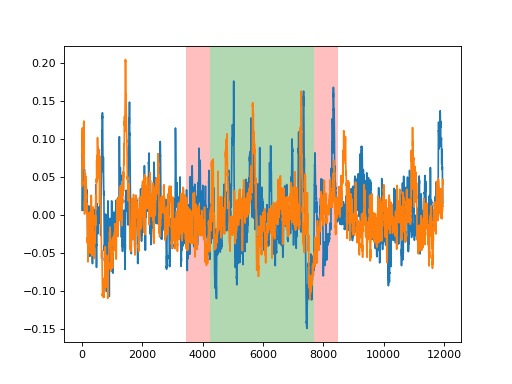

In [2]:
ltest = numpy.load("B:/Dual/20190808/Experiment_2/Derivatives/l_global_signal.npy")
rtest = numpy.load("B:/Dual/20190808/Experiment_2/Derivatives/r_global_signal.npy")

TRUE_FRAMERATE = 28.815
together_duration = 120
translation_duration = 27.5
first_translation = 119.5

start_first_translation = numpy.round(numpy.multiply(first_translation, TRUE_FRAMERATE))
end_first_translation = numpy.round(numpy.multiply(first_translation + translation_duration, TRUE_FRAMERATE))

start_interaction = numpy.round(numpy.multiply(first_translation + translation_duration, TRUE_FRAMERATE))
end_interaction = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration, TRUE_FRAMERATE))

start_second_translation = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration, TRUE_FRAMERATE))
end_second_translation = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration+translation_duration, TRUE_FRAMERATE))

%matplotlib notebook

plt.figure()
plt.plot(ltest)
plt.plot(rtest)
plt.axvspan(
    start_interaction,
    end_interaction,
    facecolor="g",
    alpha=0.3,
    label="Duration of Togetherness",
)
plt.axvspan(
    start_first_translation,
    end_first_translation,
    facecolor="r",
    alpha=0.25,
    label="Duration of Translation",
)
plt.axvspan(
    start_second_translation,
    end_second_translation,
    facecolor="r",
    alpha=0.25,
    label="Duration of Translation",
)

In [56]:
# SAVE ALL GLOBAL SIGNALS HERE

save_path = ''

experiments = [['20190729','1','2','3','4'],
               ['20190808','1','2','3','4','5','6','7','8'],
               ['20190815','1','2','3','4','5','6'],
               ['20190821','1','2','3','4','5','6'],
               ['20190822','1','2','3','4'],
               ['20190823','1','2','3','4','5','6','7','8'],
               ['20190826','1','2','3','4','5','6'],
               ['20190827','1','2','3','4'],
               ['20190828','1','2','3','4','5','6','7','8','9'],
               ['20190829','1','2','3','4','5','6','7','8'],
              ]

count = 0
for i in range(len(experiments)):
    for j in range(len(experiments[i]) - 1):        
        try:
            EXP = direc.experiment(experiments[i][0], int(experiments[i][1+j]))
            gs_file = direc.file(
                exp_folder=EXP, 
                fname="left global"
            )
            print(gs_file)
            temp_gs = numpy.load(gs_file)
            truncated_arr = temp_corr[:,0:11898-window_size]
            #correlation_heatmap[:, :, count] = truncated_arr[:, 0:numpy.shape(correlation_heatmap)[1]]
            correlation_heatmap = numpy.dstack((correlation_heatmap, truncated_arr))
            count +=1
        except:
            print("either no experiment %d in folder %s, or the assignement failed" % (exp_num,date))


B:\Dual\20190729\Experiment_1


NameError: name 'exp_num' is not defined

In [2]:
path = "B:/Dual/" # location of "date" folders

direc = lb.Data(path)

#FEMALES
# experiment_numbers = [1,2,3,4]
# dates = ['20190813','20190815','20190816'] #females only no mesh

#experiment_numbers = [1,2,3,4,5,6,7,8,9]
#MALES
#dates = ['20190729','20190808','20190821', '20190822'] #no females no mesh

#MESH
#dates = ['20190823', '20190826'] #mesh exp no females
#OPAQUE
#dates = ['20190827','20190828']

#all
# dates = ['20190808','20190813','20190815','20190816','20190821','20190822','201980823','20190826']
# experiment_numbers = [1,2,3,4,5,6,7,8,9]

##################################################################

#CAGE-MATES MALE MESH
# experiments = [['20190823', '1','2','3','5','6','7'],
#               ['20190826','1','4','6'],
#               ['20190829','3','5']]

#NON CAGE-MATES MALE MESH
# experiments = [['20190823', '4','8'],
#               ['20190826','2','3','5']]

#ALL
experiments = [['20190823', '1','2','3','4','5','6','7','8'],
              ['20190826','1','2','3','4','5','6'],
              ['20190829','3','5']]

#HIGH DOMINANCE DIFFERENCE
# experiments = [['20190823', '1','2','3','5','6'],
#               ['20190826','1','6'],
#               ['20190829','3','5']]

#LOW DOMINANCE DIFFERENCE
# experiments = [['20190823', '4','7','8'],
#               ['20190826','2','3','4','5']]

#########################################

#CAGE-MATES MALE OPAQUE
# experiments = [['20190827', '1','2','3','4'],
#                ['20190828','1','2','3','9'],
#                ['20190829','1','7']]

#NON CAGE-MATES MALE OPAQUE
# experiments = [['20190828','4','5','6','7','8']]

#ALL
# experiments = [['20190827', '1','2','3','4'],
#               ['20190828','1','2','3','4','5','6','7','8','9'],
#               ['20190829','1','7']]

#HIGH DOMINANCE DIFFERENCE
# experiments = [['20190827', '1','3','4'],
#               ['20190828','1','3','4','8','9'],
#               ['20190829','1']]

#LOW DOMINANCE DIFFERENCE
# experiments = [['20190827', '2'],
#               ['20190828','2','5','6','7'],
#               ['20190829','7']]

#########################################

#CAGE-MATES MALE
# experiments = [['20190729', '1','2'],
#                ['20190808','1','2','3','4','5','6','7','8'],
#                ['20190815','5','6'],
#                ['20190829','2','4','6','8']]

#NON CAGE-MATES MALE
# experiments = [['20190729', '3','4'],
#                ['20190821','1'],
#                ['20190822','1','2','3','4']]

#ALL
experiments = [['20190729', '1','2','3','4'],
               ['20190808','1','2','3','4','5','6','7','8'],
               ['20190815','5','6'],
               ['20190821','1'],
               ['20190822','1','2','3','4'],
               ['20190829','2','4','6','8']]

# ALL EXPERIMENTS NEW BATCH
# experiments = [['20190729', '1','2','3','4'],
#                ['20190808','1','2','3','4','5','6','7','8'],
#                ['20190815','5','6'],
#                ['20190821','1'],
#                ['20190822','1','2','3','4'],
#                ['20190829','2','4','6','8']]

#OLD
# experiments = [['20180312', '2','4','6','8', '10'],
#                ['20180316','1'],
#                ['20180823','3']]

#HIGH DOMINANCE DIFFERENCE
# experiments = [['20190729', '1','2','3','4'],
#                ['20190808','1','2'],
#                ['20190821','1'],
#                ['20190822','1','4'],
#                ['20190829','4','6','8']]

#LOW DOMINANCE DIFFERENCE
# experiments = [['20190808','3','4','5','6','7','8'],
#                ['20190822','2','3'],
#                ['20190829','2']]

#########################################

TRUE_FRAMERATE = 28.815

# Correlation vs Frequency and Time

In [62]:
#USES EXPERIMENTS 2D ARRAY

window_size = 864
correlation_heatmap = []
correlation_heatmap = numpy.empty([10, 11898-window_size, 0])

count = 0
for i in range(len(experiments)):
    for j in range(len(experiments[i]) - 1):        
        try:
            EXP = direc.experiment(experiments[i][0], int(experiments[i][1+j]))
            corr_file = direc.file(
                exp_folder=EXP, 
                fname="freq split ws={}".format(window_size)
            )
            print(corr_file)
            temp_corr = numpy.load(corr_file)
            print(temp_corr.shape)
            truncated_arr = temp_corr[:,0:11898-window_size]
            #correlation_heatmap[:, :, count] = truncated_arr[:, 0:numpy.shape(correlation_heatmap)[1]]
            correlation_heatmap = numpy.dstack((correlation_heatmap, truncated_arr))
            count +=1
        except:
            print("either no experiment %d in folder %s, or the assignement failed" % (int(experiments[i][1+j]),int(experiments[i][0])))
        
    
print("Total number of experiments averaged: %d" %(correlation_heatmap.shape[2]))
mean_correlation_heatmap = numpy.mean(correlation_heatmap, axis=2)
std_correlation_heatmap = numpy.std(correlation_heatmap, axis=2)
print(correlation_heatmap.shape)

B:\Dual\20190729\Experiment_1\Derivatives\frequency_split_correlation_filtered_ws=864.npy
(10, 11035)
B:\Dual\20190729\Experiment_2\Derivatives\frequency_split_correlation_filtered_ws=864.npy
(10, 11035)
B:\Dual\20190729\Experiment_3\Derivatives\frequency_split_correlation_filtered_ws=864.npy
(10, 11035)
B:\Dual\20190729\Experiment_4\Derivatives\frequency_split_correlation_filtered_ws=864.npy
(10, 11035)
B:\Dual\20190808\Experiment_1\Derivatives\frequency_split_correlation_filtered_ws=864.npy
(10, 11093)
B:\Dual\20190808\Experiment_2\Derivatives\frequency_split_correlation_filtered_ws=864.npy
(10, 11092)
B:\Dual\20190808\Experiment_3\Derivatives\frequency_split_correlation_filtered_ws=864.npy
(10, 11093)
B:\Dual\20190808\Experiment_4\Derivatives\frequency_split_correlation_filtered_ws=864.npy
(10, 11092)
B:\Dual\20190808\Experiment_5\Derivatives\frequency_split_correlation_filtered_ws=864.npy
(10, 11093)
B:\Dual\20190808\Experiment_6\Derivatives\frequency_split_correlation_filtered_ws=

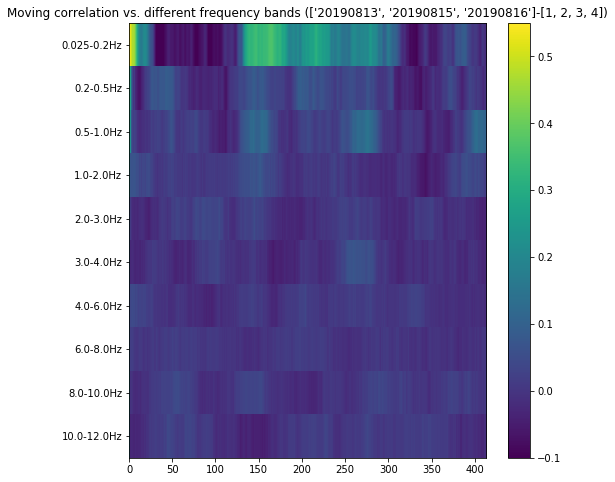

In [10]:
# frequency_bands = (
#     0.01,
#     0.1,
#     0.5,
#     1.0,
#     2.0,
#     3.0,
#     4.0,
#     6.0,
#     8.0,
#     10.0,
#     12.0,
# )

frequency_bands = (
    0.025,
    0.2,
    0.5,
    1.0,
    2.0,
    3.0,
    4.0,
    6.0,
    8.0,
    10.0,
    12.0,
)


frequency_labels = []
for i, (low, high) in enumerate(zip(frequency_bands, frequency_bands[1:])):
    frequency_labels.append(
        str(low) + "-" + str(high) + "Hz"
    )


plt.figure(figsize=(8, 8))
plt.title(
    "Moving correlation vs. different frequency bands ({}-{})".format(dates, experiment_numbers)
)
y_ticks = numpy.arange(numpy.shape(mean_correlation_heatmap)[0])+0.5
y_ticks = numpy.flipud(y_ticks)
plt.imshow(
    mean_correlation_heatmap, 
    cmap='viridis', 
    extent=[0,413,0,10],
    aspect='auto', 
    vmin=-0.1, 
    vmax=0.55
)
plt.yticks(y_ticks, frequency_labels)
plt.colorbar()
#plt.savefig("D:/DualMouse/Spectrogram_ws864_no_mesh_no_females.png",dpi = 100, facecol = 'white', format = 'png')

(10, 11034, 11)


NameError: name 'aeljthjael' is not defined

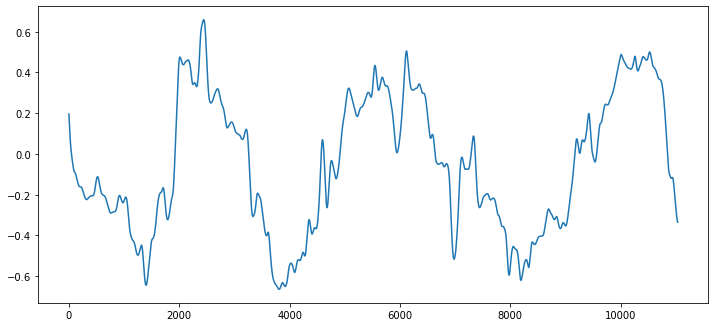

In [9]:
together_duration = 120
translation_duration = 27.5
first_translation = 119.5

TRUE_FRAMERATE = 28.815

start_first_translation = numpy.round(numpy.multiply(first_translation, TRUE_FRAMERATE))
end_first_translation = numpy.round(numpy.multiply(first_translation + translation_duration, TRUE_FRAMERATE))

start_interaction = numpy.round(numpy.multiply(first_translation + translation_duration, TRUE_FRAMERATE))
end_interaction = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration, TRUE_FRAMERATE))

start_second_translation = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration, TRUE_FRAMERATE))
end_second_translation = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration+translation_duration, TRUE_FRAMERATE))



plt.figure(figsize=(12, 12))
plt.subplot(211)

print(correlation_heatmap.shape)

imshow(
    mean_correlation_heatmap, 
    cmap='viridis', 
    extent=[0,413,0,10],
    aspect='auto', 
    vmin=-0.1, 
    vmax=0.55
)
aeljthjael

for j in range(correlation_heatmap.shape[2]):
    gs = correlation_heatmap[0,:,j]
    corrs = []
    for i in range(int(window_size/2)):
        corrs.append(float('nan'))
    for i in range(len(gs)):
        corrs.append(gs[i])
    for i in range(int(window_size/2)):
        corrs.append(float('nan'))
    c = j/correlation_heatmap.shape[2]
    plt.plot(corrs, color=plt.cm.jet(c), alpha=0,linewidth = 2)
    #plt.show()

gs = mean_correlation_heatmap[0]
corrs = []
for i in range(int(window_size/2)):
    corrs.append(float('nan'))
for i in range(len(gs)):
    corrs.append(gs[i])
for i in range(int(window_size/2)):
    corrs.append(float('nan'))

plt.plot(corrs, "b", label="Mean Global Signal", linewidth=4)
    
std_gs = std_correlation_heatmap[0]
stds = []
for i in range(int(window_size/2)):
    stds.append(float('nan'))
for i in range(len(std_gs)):
    stds.append(std_gs[i])
for i in range(int(window_size/2)):
    stds.append(float('nan'))

corr_x_axis = numpy.linspace(
    0, len(corrs), len(corrs)
)

plt.axvspan(
    start_first_translation,
    end_first_translation,
    facecolor="r",
    alpha=0.25,
    label="Duration of Translation",
)
plt.axvspan(
    start_second_translation,
    end_second_translation,
    facecolor="r",
    alpha=0.25,
    #label="Duration of Translation",
)
plt.axvspan(
    start_interaction,
    end_interaction,
    facecolor="g",
    alpha=0.3,
    label="Duration of Togetherness",
)

stds = numpy.divide(stds,numpy.sqrt(correlation_heatmap.shape[2]))
scors = numpy.add(stds, corrs)
scors2 = numpy.subtract(corrs, stds)

plt.plot(scors, 'b', alpha = 0.05)
plt.plot(scors2, 'b', alpha = 0.05)

plt.fill_between(corr_x_axis,scors2,scors,facecolor='blue',alpha=0.3)


plt.xlim(0, len(corrs))
plt.ylim(-0.6,0.6)

plt.xlabel("Frame #")
plt.ylabel("Correlation (r)")
plt.title("Average Global Signals Between Male Experiments with a Low Dominance Difference WS=1500")
plt.legend(loc=4, prop={'size': 10})
#plt.savefig("D:/DualMouse/Correlation_ws1500_males_high_dominance.png",dpi = 100, transparent=True, format = 'png')

In [97]:
# experiments = [['20190827', '1','2','3','4'],
#               ['20190828','1','2','3','4','5','6','7','8','9'],
#               ['20190829','1','7']]

# experiments = [['20190823', '4']]

experiments = [['20190729', '1']]


# ROI-based seed pixel correlation

In [5]:
print(num_expts)

4


In [3]:
answer_left = 1
answer_right = 1

WIDTH = 256
HEIGHT = 256

# pixels per mm
radius = 5
l_ppmm = 30
r_ppmm = 30

# window_size = 864
window_size = int(TRUE_FRAMERATE*5)

# define seed locations
seeds = (
    ("M1", 1.03 + 1, 1.365),
    ("FL", 0.16, 2.47),
    ("HL", -0.7, 1.85),
    ("aBC", -1.36 + 0.575, 3.35),
    ("pBC", -1.9, 3.35),
    ("AC", 0 + 1, 0.6),
    ("RS", -2.8858 + 1, 0.62043),
    ("V1", -4.2678 + 0.8, 2.5168),
    ("mPTA", -2.4962, 2.2932),
    ("lPTA", -2.4962 - 0.3, 3.35 - 0.2),
    ("Un", -1.5, 2.6),
)

num_expts = 0
for i in range(len(experiments)):
    for j in range(len(experiments[i]) - 1): 
        num_expts +=1


l_scaled_seeds_arr = []
r_scaled_seeds_arr = []


# boolean array to handle images of different sizes
reshape_left = numpy.zeros(num_expts)
reshape_right = numpy.zeros(num_expts)

counter = 0
for i in range(len(experiments)):
    for j in range(len(experiments[i]) - 1):
        EXP = direc.experiment(experiments[i][0], int(experiments[i][1+j]))
        l_mask_file = direc.file(exp_folder=EXP, fname='LM mask')
        r_mask_file = direc.file(exp_folder=EXP, fname='RM mask')
        l_mouse_mask = numpy.load(l_mask_file)
        r_mouse_mask = numpy.load(r_mask_file)
        
        
        # check to resize and update the boolean array
        if l_mouse_mask.shape == (256, 256):
#             l_mouse_mask = vp.downsample(l_mouse_mask, (64, 64))
            l_mouse_mask = numpy.array(Image.fromarray(l_mouse_mask).resize((64, 64)))
            reshape_left[counter] = True

        if r_mouse_mask.shape == (256,256):
#             r_mouse_mask = vp.downsample(r_mouse_mask, (64, 64))
            r_mouse_mask = numpy.array(Image.fromarray(r_mouse_mask).resize((64, 64)))
            reshape_right[counter] = True
            
        min_L_y = 0
        max_L_y = 0
            
        for x in range(l_mouse_mask.shape[0]):
            for y in range(l_mouse_mask.shape[1]):
                if l_mouse_mask[x,y] and min_L_y == 0:
                    min_L_y = x
                if l_mouse_mask[x,y]:
                    max_L_y = x
                        
        min_R_y = 0
        max_R_y = 0
            
        for x in range(r_mouse_mask.shape[0]):
            for y in range(r_mouse_mask.shape[1]):
                if r_mouse_mask[x,y] and min_R_y == 0:
                    min_R_y = x
                if r_mouse_mask[x,y]:
                    max_R_y = x

            
        diffL = max_L_y - min_L_y
        diffR = max_R_y - min_R_y
          
        l_ppmm = diffL/1.9
        r_ppmm = diffR/1.9
        

        
        # select bregma for each brain
        left_blue_frame_file   =  direc.file(exp_folder=EXP, fname="left blue")            
        left_green_frame_file  =  direc.file(exp_folder=EXP, fname="left green")            
        right_blue_frame_file  =  direc.file(exp_folder=EXP, fname="right blue")           
        right_green_frame_file =  direc.file(exp_folder=EXP, fname="right green")                                   
        l_mouse_blue   =  numpy.load(left_blue_frame_file)
        l_mouse_green  =  numpy.load(left_green_frame_file)
        r_mouse_blue   =  numpy.load(right_blue_frame_file)
        r_mouse_green  =  numpy.load(right_green_frame_file) 
        
#         if reshape_left[counter]:
#             l_mouse_blue = vp.downsample(l_mouse_blue, (64, 64))
#             l_mouse_green = vp.downsample(l_mouse_green, (64, 64))
            
#         if reshape_right[counter]:
#             r_mouse_blue = vp.downsample(r_mouse_blue, (64, 64))
#             r_mouse_green = vp.downsample(r_mouse_green, (64, 64))
        
        
        # ------assign seed pixel ROIs relative to bregma-------------
        
        # left mouse
        while answer_left == 1:
            %matplotlib qt
            l_bregma = seed.Bregma(l_mouse_blue)
            plt.waitforbuttonpress()
            plt.close()

            l_scaled_seeds = seed.generate_scaled_seeds(seeds=seeds, bregma=l_bregma, ppmm=l_ppmm, direction="r")

            plt.figure()
            test = numpy.copy(l_mouse_green)
            for pp in l_scaled_seeds:
                if pp.row >= 0 and pp.col >= 0:
                    test[pp.row-radius:pp.row+radius, pp.col-radius:pp.col+radius] = 1000
            plt.imshow(test, cmap='gray', vmin= 0, vmax= 155)
            plt.waitforbuttonpress()
            plt.close()
            
            answer_left = messagebox.askretrycancel("Question", "Do you want to try that again?")

        
        l_scaled_seeds_arr.append(l_scaled_seeds)

        
        
        # right mouse
        while answer_right == 1:
            %matplotlib qt
            r_bregma = seed.Bregma(r_mouse_blue)
            plt.waitforbuttonpress()
            plt.close()

            r_scaled_seeds = seed.generate_scaled_seeds(seeds=seeds, bregma=r_bregma, ppmm=r_ppmm, direction="l")         
            plt.figure()
            test = numpy.copy(r_mouse_green)
            for pp in r_scaled_seeds:
                if pp.row >= 0 and pp.col >= 0:
                    test[pp.row-radius:pp.row+radius, pp.col-radius:pp.col+radius] = 1000
            plt.imshow(test, cmap='gray', vmin= 0, vmax= 155)
            plt.waitforbuttonpress()
            plt.close()
            
            answer_right = messagebox.askretrycancel("Question", "Do you want to try that again?")
            
        r_scaled_seeds_arr.append(r_scaled_seeds)
        answer_left = 1
        answer_right = 1
        counter += 1
        

correlation_heatmap = []
correlation_heatmap = numpy.empty([44, 44, 11898-window_size, num_expts])

curr_expts = 0
for i in range(len(experiments)):
    for j in range(len(experiments[i]) - 1):        
        if True:
            EXP = direc.experiment(experiments[i][0], int(experiments[i][1+j]))
            left_corrected_file = direc.file(exp_folder=EXP, fname="left green 0.01-12.0Hz")
            right_corrected_file = direc.file(exp_folder=EXP, fname="right green 0.01-12.0Hz")
            
            left_frames = vp.extract_RAW_frames(left_corrected_file, WIDTH, HEIGHT, num_channels=1, dtype='float32')            
            right_frames = vp.extract_RAW_frames(right_corrected_file, WIDTH, HEIGHT, num_channels=1, dtype='float32')
            
            # truncate frames
            left_frames = left_frames[0:11898, :, :]
            right_frames = right_frames[0:11898, :, :]
            
            
            
            for ii in range(left_frames.shape[0]-window_size):
                if ii%250 == 0:
                    print(ii)
                a = seed.generate_correlation_matrix(
                    l_mouse_frames=left_frames[ii:ii+window_size], 
                    r_mouse_frames=right_frames[ii:ii+window_size],
                    l_seeds=l_scaled_seeds_arr[curr_expts],
                    r_seeds=r_scaled_seeds_arr[curr_expts],
                    title="Correlation matrix",
                    filename="correlation_matrix",
                    radius=5,
                    interpolation="nearest",
                    cmap="viridis",
                    figsize=(10, 11)
                )
                
                correlation_heatmap[:, :, ii, curr_expts] = a[1]
            
            print(left_corrected_file)
        curr_expts += 1



Bregma Location: Column 127 Row 123Direction chosen: r
Bregma Location: Column 117 Row 177Direction chosen: r
Bregma Location: Column 128 Row 123Direction chosen: r
Bregma Location: Column 124 Row 117Direction chosen: l
Bregma Location: Column 123 Row 118Direction chosen: l
Bregma Location: Column 142 Row 125Direction chosen: r
Bregma Location: Column 124 Row 115Direction chosen: l
Bregma Location: Column 146 Row 125Direction chosen: r
Bregma Location: Column 122 Row 115Direction chosen: l
Bregma Location: Column 124 Row 111Direction chosen: l
Bregma Location: Column 142 Row 124Direction chosen: r
Bregma Location: Column 124 Row 120Direction chosen: l
Bregma Location: Column 128 Row 139Direction chosen: r
Bregma Location: Column 106 Row 130Direction chosen: l
Bregma Location: Column 113 Row 129Direction chosen: l
Bregma Location: Column 142 Row 135Direction chosen: r
Bregma Location: Column 104 Row 132Direction chosen: l
Bregma Location: Column 140 Row 136Direction chosen: r
Bregma Loc

In [5]:
numpy.save('B:/Social_Outputs/group_data/20200304_all_roi_all_male_opaque.npy', correlation_heatmap)

In [64]:
test2 = numpy.load('B:/Social_Outputs/group_data/all_male_global_signal_correlations_unfiltered_30s.npy')

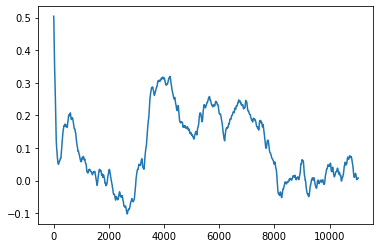

In [67]:
plt.figure()
plt.plot(numpy.mean(test2, axis=0))

In [71]:
x_axis = numpy.linspace(0, test2.shape[1]/TRUE_FRAMERATE, test2.shape[1])
print(x_axis[-1:])

[382.9255596]


(11034,)


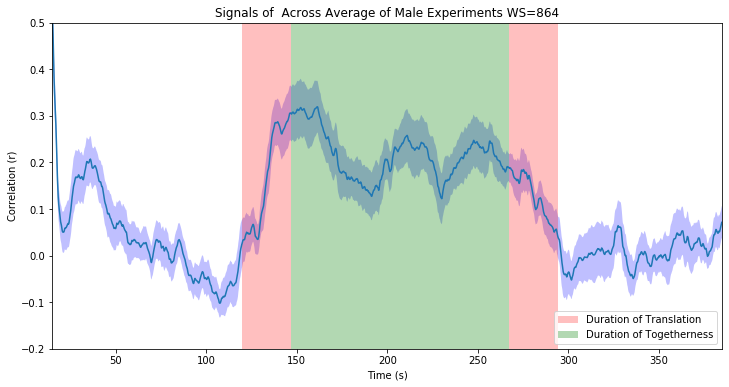

In [96]:
%matplotlib inline
together_duration = 120
translation_duration = 27.5
first_translation = 119.5

TRUE_FRAMERATE = 28.815

x_axis = numpy.linspace(864/(2*TRUE_FRAMERATE), test2.shape[1]/TRUE_FRAMERATE + 864/(2*TRUE_FRAMERATE), test2.shape[1])

start_first_translation = first_translation
end_first_translation = first_translation + translation_duration

start_interaction = first_translation + translation_duration
end_interaction = first_translation + translation_duration+together_duration

start_second_translation = first_translation + translation_duration+together_duration
end_second_translation = first_translation + translation_duration+together_duration+translation_duration



mean_correlations = numpy.mean(test2,axis=0)
print(numpy.shape(mean_correlations))


plt.figure(figsize=(12, 6))
plt.plot(x_axis,numpy.mean(test2, axis=0))
plt.fill_between(x_axis, numpy.mean(test2, axis=0), 
                 numpy.mean(test2, axis=0)+numpy.std(test2,axis=0)/numpy.sqrt(test2.shape[0]), 
                 facecolor = 'blue', alpha = 0.25)
plt.fill_between(x_axis, numpy.mean(test2, axis=0), 
                 numpy.mean(test2, axis=0)-numpy.std(test2,axis=0)/numpy.sqrt(test2.shape[0]), 
                 facecolor = 'blue', alpha = 0.25)
# roi_r = 8
# roi_c = 30
# 
# corrs = []
# for i in range(int(window_size/2)):
#     corrs.append(float('nan'))
# for i in range(mean_correlations.shape[2]):
#     corrs.append(mean_correlations[roi_r,roi_c,i])
# for i in range(int(window_size/2)):
#     corrs.append(float('nan'))
# plt.plot(corrs)

# for x in range(22):
#     for y in range(22):
#         corrs = []
#         for i in range(int(window_size/2)):
#             corrs.append(float('nan'))
#         for i in range(mean_correlations.shape[2]):
#             corrs.append(mean_correlations[x,y+22,i])
#         for i in range(int(window_size/2)):
#             corrs.append(float('nan'))
#         plt.plot(corrs)
        
plt.axvspan(
    start_first_translation,
    end_first_translation,
    facecolor="r",
    alpha=0.25,
    label="Duration of Translation",
)
plt.axvspan(
    start_second_translation,
    end_second_translation,
    facecolor="r",
    alpha=0.25,
    #label="Duration of Translation",
)
plt.axvspan(
    start_interaction,
    end_interaction,
    facecolor="g",
    alpha=0.3,
    label="Duration of Togetherness",
)
plt.ylim((-0.2,0.5))
plt.xlim((15, 385))
plt.xlabel("Time (s)")
plt.ylabel("Correlation (r)")
plt.title("Signals of  Across Average of Male Experiments WS=864")
plt.legend(loc=4, prop={'size': 10})
#plt.savefig("D:/DualMouse/Correlation_ws864_males_all_roi.png",dpi = 300, transparent=True, format = 'png')

# ROI based correlations chunked to 60 s epochs for separate vs together

In [120]:
print(min_L_y)
print(max_L_y)
print(counter)

6
61
2017


In [4]:
answer_left = 1
answer_right = 1

WIDTH = 256
HEIGHT = 256


# New experiment separate1 times
start_separate_frame1 = 1714
end_separate_frame1 = 3443

# New experiment together times
# start_together_frame = 3371
# end_together_frame = 5100

start_together_frame = 4235
end_together_frame = 5965

# New experiment separate2 times
start_separate_frame2 = 8486
end_separate_frame2 = 10214

# Old experiment separate times
# start_separate_frame = 7780
# end_separate_frame = 9508

# pixels per mm
radius = 5
l_ppmm = 30
r_ppmm = 30

# define seed locations
seeds = (
    ("M1", 1.03 + 1, 1.365),
    ("FL", 0.16, 2.47),
    ("HL", -0.7, 1.85),
    ("aBC", -1.36 + 0.575, 3.35),
    ("pBC", -1.9, 3.35),
    ("AC", 0 + 1, 0.6),
    ("RS", -2.8858 + 1, 0.62043),
    ("V1", -4.2678 + 0.8, 2.5168),
    ("mPTA", -2.4962, 2.2932),
    ("lPTA", -2.4962 - 0.3, 3.35 - 0.2),
    ("Un", -1.5, 2.6),
)

num_expts = 0
for i in range(len(experiments)):
    for j in range(len(experiments[i]) - 1): 
        num_expts +=1


l_scaled_seeds_arr = []
r_scaled_seeds_arr = []


for i in range(len(experiments)):
    for j in range(len(experiments[i]) - 1):
        # load experiments
        EXP = direc.experiment(experiments[i][0], int(experiments[i][1+j]))
        l_mask_file = direc.file(exp_folder=EXP, fname='LM mask')
        r_mask_file = direc.file(exp_folder=EXP, fname='RM mask')

        l_mouse_mask = numpy.load(l_mask_file)
        r_mouse_mask = numpy.load(r_mask_file)
        
        
        # estimate image scale
        min_L_y = 0
        max_L_y = 0
        
        if l_mouse_mask.shape[0] != 64:
            l_mouse_mask = numpy.array(Image.fromarray(l_mouse_mask).resize((64,64)))
        
        for x in range(l_mouse_mask.shape[0]):
            for y in range(l_mouse_mask.shape[1]):
                if l_mouse_mask[x,y] and min_L_y == 0:
                    min_L_y = x
                if l_mouse_mask[x,y]:
                    max_L_y = x
                        
        min_R_y = 0
        max_R_y = 0
        
        if r_mouse_mask.shape[0] != 64:
            r_mouse_mask = numpy.array(Image.fromarray(r_mouse_mask).resize((64,64)))
            
        for x in range(r_mouse_mask.shape[0]):
            for y in range(r_mouse_mask.shape[1]):
                if r_mouse_mask[x,y] and min_R_y == 0:
                    min_R_y = x
                if r_mouse_mask[x,y]:
                    max_R_y = x

            
        diffL = max_L_y - min_L_y
        diffR = max_R_y - min_R_y
          
        l_ppmm = diffL/1.9
        r_ppmm = diffR/1.9
            
        # select bregma for each brain
        left_blue_frame_file = direc.file(exp_folder=EXP, fname="left blue")            
        left_green_frame_file = direc.file(exp_folder=EXP, fname="left green")            
        right_blue_frame_file = direc.file(exp_folder=EXP, fname="right blue")            
        right_green_frame_file = direc.file(exp_folder=EXP, fname="right green")
            
            
            
        l_mouse_blue = numpy.load(left_blue_frame_file)
        l_mouse_green = numpy.load(left_green_frame_file)   
        r_mouse_blue = numpy.load(right_blue_frame_file)
        r_mouse_green = numpy.load(right_green_frame_file) 
        
        # ------assign seed pixel ROIs relative to bregma-------------
        
        # left mouse
        while answer_left == 1:
            %matplotlib qt
            l_bregma = seed.Bregma(l_mouse_blue)
            plt.title('click on bregma')
            plt.waitforbuttonpress()
            plt.close()

            l_scaled_seeds = seed.generate_scaled_seeds(
                seeds=seeds, bregma=l_bregma, ppmm=l_ppmm, direction = "r" # ppmm=31.25,
            )

            plt.figure()
            test = numpy.copy(l_mouse_green)
            for pp in l_scaled_seeds:
                if pp.row >= 0 and pp.col >= 0:
                    test[pp.row-radius:pp.row+radius, pp.col-radius:pp.col+radius] = 1000
            plt.imshow(test, cmap='gray', vmin= 0, vmax= 155)
            plt.title(str(l_ppmm))
            plt.waitforbuttonpress()
#             if i==0:
#                 plt.savefig('B:/Social_Outputs/group_data/20200305_left_mouse_seedpixellocations.pdf')
            plt.close()
            
            answer_left = messagebox.askretrycancel("Question", "Do you want to try that again?")

        
        l_scaled_seeds_arr.append(l_scaled_seeds)

        
        
        # right mouse
        while answer_right == 1:
            %matplotlib qt
            r_bregma = seed.Bregma(r_mouse_blue)
            plt.title('click on bregma')
            plt.waitforbuttonpress()
            plt.close()

            r_scaled_seeds = seed.generate_scaled_seeds(
                seeds=seeds, bregma=r_bregma, ppmm=r_ppmm, direction = "l" # ppmm=31.25
            )
          
            plt.figure()
            plt.title(str(r_ppmm))
            test = numpy.copy(r_mouse_green)
            for pp in r_scaled_seeds:
                if pp.row >= 0 and pp.col >= 0:
                    test[pp.row-radius:pp.row+radius, pp.col-radius:pp.col+radius] = 1000
            plt.imshow(test, cmap='gray', vmin= 0, vmax= 155)
            plt.waitforbuttonpress()
#             if j==3:
#                 plt.savefig('B:/Social_Outputs/group_data/20200305_right_mouse_seedpixellocations.pdf')
            plt.close()
            
            answer_right = messagebox.askretrycancel("Question", "Do you want to try that again?")
            
        r_scaled_seeds_arr.append(r_scaled_seeds)
        answer_left = 1
        answer_right = 1
        


correlation_heatmap_together  = numpy.empty([44, 44, num_expts])
correlation_heatmap_separate1 = numpy.empty([44, 44, num_expts])
correlation_heatmap_separate2 = numpy.empty([44, 44, num_expts])


curr_expts = 0
for i in range(len(experiments)):
    for j in range(len(experiments[i]) - 1):        
        if True:
            EXP = direc.experiment(experiments[i][0], int(experiments[i][1+j]))
            left_corrected_file = direc.file(
                exp_folder=EXP, 
                fname="left green 0.01-12.0Hz"
            )
            right_corrected_file = direc.file(
                exp_folder=EXP, 
                fname="right green 0.01-12.0Hz"
            )
            
            left_frames = vp.extract_RAW_frames(left_corrected_file, WIDTH, HEIGHT, num_channels=1, dtype='float32')            
            right_frames = vp.extract_RAW_frames(right_corrected_file, WIDTH, HEIGHT, num_channels=1, dtype='float32')
            

            # correlation for separate1
            a_separate1 = seed.generate_correlation_matrix(
            l_mouse_frames=left_frames[start_separate_frame1:end_separate_frame1],
                r_mouse_frames=right_frames[start_separate_frame1:end_separate_frame1],
                l_seeds=l_scaled_seeds_arr[curr_expts],
                r_seeds=r_scaled_seeds_arr[curr_expts],
                title="Correlation matrix",
                filename="correlation_matrix",
                radius=5,
                interpolation="nearest",
                cmap="viridis",
                figsize=(10, 11)
            )
            
            # correlation for separate2
            a_separate2 = seed.generate_correlation_matrix(
            l_mouse_frames=left_frames[start_separate_frame2:end_separate_frame2],
                r_mouse_frames=right_frames[start_separate_frame2:end_separate_frame2],
                l_seeds=l_scaled_seeds_arr[curr_expts],
                r_seeds=r_scaled_seeds_arr[curr_expts],
                title="Correlation matrix",
                filename="correlation_matrix",
                radius=5,
                interpolation="nearest",
                cmap="viridis",
                figsize=(10, 11)
            )
            
            # correlation for together
            a_together = seed.generate_correlation_matrix(
            l_mouse_frames=left_frames[start_together_frame:end_together_frame],
                r_mouse_frames=right_frames[start_together_frame:end_together_frame],
                l_seeds=l_scaled_seeds_arr[curr_expts],
                r_seeds=r_scaled_seeds_arr[curr_expts],
                title="Correlation matrix",
                filename="correlation_matrix",
                radius=5,
                interpolation="nearest",
                cmap="viridis",
                figsize=(10, 11)
            )
                
            correlation_heatmap_separate1[:, :, curr_expts] = a_separate1[1]
            correlation_heatmap_separate2[:, :, curr_expts] = a_separate2[1]
            correlation_heatmap_together[:, :, curr_expts] = a_together[1]
            
            print(left_corrected_file)
        curr_expts += 1

Bregma Location: Column 146 Row 139Direction chosen: r
Bregma Location: Column 130 Row 127Direction chosen: l
Bregma Location: Column 148 Row 141Direction chosen: r
Bregma Location: Column 129 Row 128Direction chosen: l
Bregma Location: Column 145 Row 139Direction chosen: r
Bregma Location: Column 125 Row 121Direction chosen: l
Bregma Location: Column 145 Row 139Direction chosen: r
Bregma Location: Column 126 Row 120Direction chosen: l


IndexError: string index out of range

In [31]:
print(l_ppmm)
print(numpy.shape(correlation_heatmap_separate1))

plt.figure()
plt.imshow(numpy.mean(correlation_heatmap_separate1,axis=2), vmin=-0, vmax=1)
plt.colorbar()

plt.figure()

plt.imshow(numpy.mean(correlation_heatmap_together,axis=2), vmin=-0, vmax=1)
plt.colorbar()

plt.figure()
plt.imshow(numpy.mean(correlation_heatmap_separate2,axis=2), vmin=-0, vmax=1)
plt.colorbar()

30.0
(44, 44, 16)


In [32]:
numpy.save('B:/Social_Outputs/group_data/20200304_all_roi_all_male_new_experiments_separate60s_mesh_correlation1.npy', correlation_heatmap_separate1)
numpy.save('B:/Social_Outputs/group_data/20200304_all_roi_all_male_new_experiments_separate60s_mesh_correlation2.npy', correlation_heatmap_separate2)
numpy.save('B:/Social_Outputs/group_data/20200304_all_roi_all_male_new_experiments_together60s_mesh_correlation.npy', correlation_heatmap_together)

In [29]:
# print(test[:,0::2])
# print(test[:,1::2])

labs = labels[0::2]
labs = ['M1', 'FL', 'HL', 'aBC', 'pBC', 'AC', 'RS', 'V1', 'mPTA', 'lPTA', 'UN']

(44, 44, 23)
(22, 44, 23)
(22, 44, 23)
(22, 22, 23)


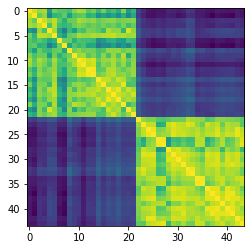

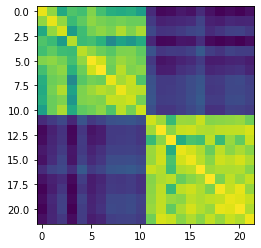

In [12]:
print(s2.shape)
test1 = s2[0::2, :, :]
test2 = s2[1::2, :, :]
test3 = test1+test2
test4 = test3[:, 0::2, :]
test5 = test3[:, 1::2, :]
test = (test4+test5)/4
print(test1.shape)
print(test2.shape)
print(test.shape)

plt.figure()
plt.imshow(s2[:,:,1])
plt.figure()
plt.imshow(test[:,:,1])

[0.12692101 0.10218264 0.09708099]
               Anova
     F Value  Num DF  Den DF Pr > F
-----------------------------------
cond 211.0801 2.0000 20.0000 0.0000

[2.37122589e-05 2.89397752e-08 7.87286310e-09]


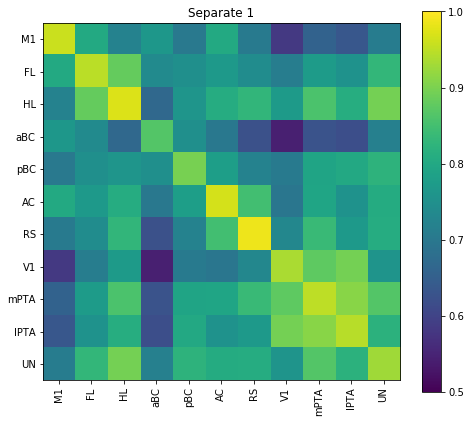

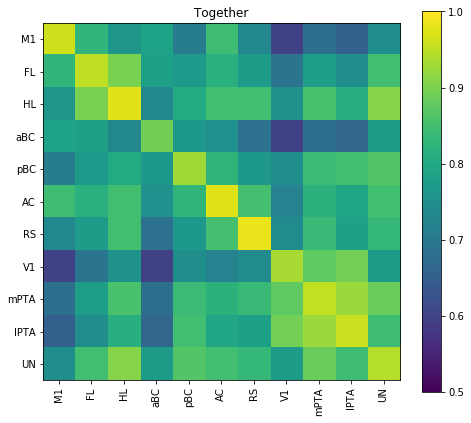

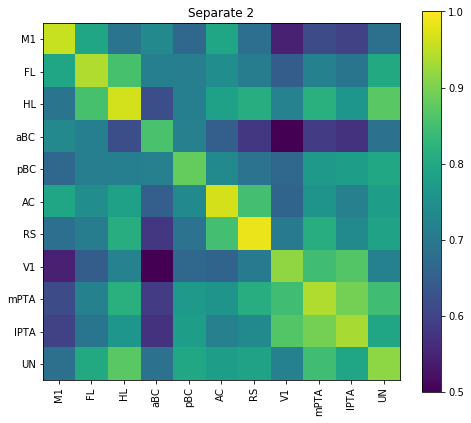

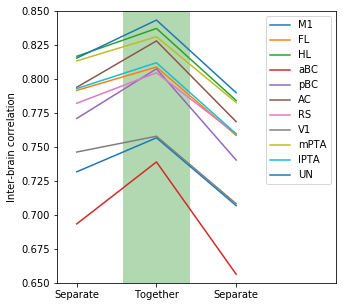

In [24]:
import pandas as pd
from statsmodels.stats.anova import AnovaRM


def downsample_correlation_matrix(mat):
    tmp1 = mat[0::2, :, :]
    tmp2 = mat[1::2, :, :]
    tmp = tmp1 + tmp2
    tmp1 = tmp[:, 0::2, :]
    tmp2 = tmp[:, 1::2, :]
    tmp = (tmp1 + tmp2)/4
    
    return(tmp)


labels = ["M1-L","M1-R","FL-L","FL-R","HL-L","HL-R","aBC-L","aBC-R","pBC-L","pBC-R","AC-L","AC-R","RS-L","RS-R",
          "V1-L","V1-R","mPTA-L","mPTA-R","lPTA-L","lPTA-R","UN-L","UN-R"]

labs = ["M1", "FL", "HL", "aBC", "pBC", "AC", "RS", "V1", "mPTA", "lPTA", "UN"]

s1 = numpy.load("B:/Social_Outputs/group_data/20200211_all_roi_all_male_new_experiments_separate60s_correlation1.npy")
# s1 = numpy.load("B:/Social_Outputs/group_data/20200304_all_roi_all_male_new_experiments_separate60s_opaque_correlation1.npy")
# s1 = numpy.load("B:/Social_Outputs/group_data/20200304_all_roi_all_male_new_experiments_separate60s_mesh_correlation1.npy")



t = numpy.load("B:/Social_Outputs/group_data/20200211_all_roi_all_male_new_experiments_together60s_correlation.npy")
# t = numpy.load("B:/Social_Outputs/group_data/20200304_all_roi_all_male_new_experiments_together60s_opaque_correlation.npy")
# t = numpy.load("B:/Social_Outputs/group_data/20200304_all_roi_all_male_new_experiments_together60s_mesh_correlation.npy")



s2 = numpy.load("B:/Social_Outputs/group_data/20200211_all_roi_all_male_new_experiments_separate60s_correlation2.npy")
# s2 = numpy.load("B:/Social_Outputs/group_data/20200304_all_roi_all_male_new_experiments_separate60s_opaque_correlation2.npy")
# s2 = numpy.load("B:/Social_Outputs/group_data/20200304_all_roi_all_male_new_experiments_separate60s_mesh_correlation2.npy")


# ### ### ###
plt.figure(figsize=(8,7))
# plt.imshow(numpy.mean(s1[0:22,22:44],axis=2), vmin=-0.2, vmax=0.5)
s11 = downsample_correlation_matrix(s1)
plt.imshow(numpy.mean(s11[0:11,0:11],axis=2), vmin=0.5, vmax=1)
plt.xticks(numpy.arange(11), labs, rotation=90)
plt.yticks(numpy.arange(11), labs, rotation=0)
plt.colorbar()
# plt.ylabel('Stationary Mouse')
# plt.xlabel('Moving Mouse')
plt.title('Separate 1')
# plt.savefig('B:/Social_Outputs/group_data/20200317_separate1_intra-brain_correlation_matrices.pdf')

plt.figure(figsize=(8,7))
# plt.imshow(numpy.mean(t[0:22,22:44],axis=2), vmin=-0.2, vmax=0.5)
t11 = downsample_correlation_matrix(t)
plt.imshow(numpy.mean(t11[0:11,0:11],axis=2), vmin=0.5, vmax=1)
plt.xticks(numpy.arange(11), labs, rotation=90)
plt.yticks(numpy.arange(11), labs, rotation=0)
plt.colorbar()
# plt.ylabel('Stationary Mouse')
# plt.xlabel('Moving Mouse')
plt.title('Together')
# plt.savefig('B:/Social_Outputs/group_data/20200317_together_intra-brain_correlation_matrices.pdf')


plt.figure(figsize=(8,7))
# plt.imshow(numpy.mean(s2[0:22,22:44],axis=2), vmin=-0.2, vmax=0.5)
s21 = downsample_correlation_matrix(s2)
plt.imshow(numpy.mean(s21[0:11,0:11],axis=2), vmin=0.5, vmax=1)
plt.xticks(numpy.arange(11), labs, rotation=90)
plt.yticks(numpy.arange(11), labs, rotation=0)
plt.colorbar()
# plt.ylabel('Stationary Mouse')
# plt.xlabel('Moving Mouse')
plt.title('Separate 2')
# plt.savefig('B:/Social_Outputs/group_data/20200317_separate2_intra-brain_correlation_matrices.pdf')
# ### ### ###


# get average INTRA-BRAIN r by ROI for each trial
tinterbrain  = t11[0:11,0:11,:]
sinterbrain1 = s11[0:11,0:11,:]
sinterbrain2 = s21[0:11,0:11,:]

# get average INTER-BRAIN r by ROI for each trial
# tinterbrain  =  t[22:44,0:22,:]
# sinterbrain1 = s1[22:44,0:22,:]
# sinterbrain2 = s2[22:44,0:22,:]


# ## ## ## average correlation per mouse
sr_by_ROI1 = numpy.asarray(numpy.mean(numpy.mean(sinterbrain1,axis=0),axis=0))
tr_by_ROI  = numpy.asarray(numpy.mean(numpy.mean(tinterbrain, axis=0),axis=0))
sr_by_ROI2 = numpy.asarray(numpy.mean(numpy.mean(sinterbrain2,axis=0),axis=0))


# ## ## ## r by ROI
sr_by_ROI1 = numpy.asarray(numpy.mean(numpy.mean(sinterbrain1,axis=1),axis=1))
tr_by_ROI  = numpy.asarray(numpy.mean(numpy.mean(tinterbrain, axis=1),axis=1))
sr_by_ROI2 = numpy.asarray(numpy.mean(numpy.mean(sinterbrain2,axis=1),axis=1))


test=numpy.vstack((sr_by_ROI1,tr_by_ROI,sr_by_ROI2))
plt.figure(figsize=(5,5))
plt.plot(test)
# plt.plot(test, color = [0, 0, 0], alpha=0.3)
plt.xticks([0, 1, 2], ['Separate','Together','Separate'])
plt.axvspan(0.58333,1.41667,facecolor="g",alpha=0.3)
# plt.plot(numpy.mean(test,axis=1), color = [0, 0, 0], linewidth=3)
plt.ylabel('Inter-brain correlation')
plt.legend(labs)

# plt.title('20200304_all_opaque_expts')
# plt.text(0.975,0.7,'*',fontsize=16)
plt.axis([-0.25, 3.25, 0.65, 0.85])



# test=numpy.vstack((sr_by_ROI1,tr_by_ROI,sr_by_ROI2))
# plt.figure(figsize=(3,5))
# # plt.plot(test, color = [0, 0, 0], alpha=0.3)
# roi_l = test[:,0::2]
# roi_r = test[:,1::2]
# roi_mean = (roi_l+roi_r)/2
# plt.plot(roi_mean)
# plt.xticks([0, 1, 2], ['Separate','Together','Separate'])
# plt.axvspan(0.58333,1.41667,facecolor="g",alpha=0.3)
# # plt.plot(numpy.mean(test,axis=1), color = [0, 0, 0], linewidth=3)
# plt.ylabel('Inter-brain correlation')
# plt.legend(labs)
# # plt.title('20200304_all_opaque_expts')
# # plt.text(0.975,0.7,'*',fontsize=16)
# plt.axis([-0.25, 2.25, -0, 0.5])
# plt.savefig('B:/Social_Outputs/group_data/rxROI_intra-brain.pdf')  

# print(test.shape)

# sr_by_ROI1 = numpy.asarray(numpy.mean(numpy.mean(sinterbrain1[8:9,8:9,:],axis=0),axis=0))
# tr_by_ROI = numpy.asarray(numpy.mean(numpy.mean(tinterbrain[8:9,8:9,:],axis=0),axis=0))
# sr_by_ROI2 = numpy.asarray(numpy.mean(numpy.mean(sinterbrain2[8:9,8:9,:],axis=0),axis=0))

# test=numpy.vstack((sr_by_ROI1,tr_by_ROI,sr_by_ROI2))
# plt.figure()
# plt.plot(test)


# plt.figure
# plt.boxplot(numpy.transpose(test))



# check normality
W = numpy.empty(3,) # test statistic
p = numpy.empty(3,) # p-value
(W[0], p[0]) = stats.shapiro(test[0,:])
(W[1], p[1]) = stats.shapiro(test[1,:])
(W[2], p[2]) = stats.shapiro(test[2,:])
print(p)

# format for one-way anova with repeated measures
num_expts = numpy.shape(test)[1]
data = numpy.reshape(test,(3*num_expts)) 

sub_id = numpy.arange(num_expts)+1
sub_id = numpy.tile(sub_id,(3))

condition = numpy.hstack(
    (numpy.tile(numpy.asarray('separate1'),num_expts),
     numpy.tile(numpy.asarray('together'), num_expts),
     numpy.tile(numpy.asarray('separate2'),num_expts))
    )

df = pd.DataFrame({'subject_ID': sub_id, 'corr': data, 'cond': condition})


# run stats
aovrm = AnovaRM(df, 'corr', 'subject_ID', within=['cond'])
res = aovrm.fit()
print(res)

# posthoc comparisons
num_comparisons = 3
(W[0], p[0]) = stats.ttest_rel(test[0,:],test[1,:])
(W[1], p[1]) = stats.ttest_rel(test[1,:],test[2,:])
(W[2], p[2]) = stats.ttest_rel(test[0,:],test[2,:])
p = p * num_comparisons
print(p)






In [8]:
print(tinterbrain.shape)
print(test.shape)
print(roi_l.shape)
print(roi_r.shape)

(22, 22, 23)
(3, 23)
(3, 12)
(3, 11)


In [59]:
import numpy
import numpy.random as nprand
print(p)
test2 = test[1,:]
# test2 = numpy.concatenate((test2, [100]))
# print(test2)
k2, p = stats.normaltest(test2)
alpha = 0.05
print("p = {:g}".format(p))

if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
    
stats.ttest_rel(test[0,:], test[1,:])

0.42504045244410116
p = 0.42504
The null hypothesis cannot be rejected


Ttest_relResult(statistic=-17.690984163553782, pvalue=4.294054199495368e-14)

## Count whisking events

In [5]:
my_var = easygui.enterbox("enter sigma")

In [6]:
print(my_var)

6


['20190729', '1', '2', '3', '4']


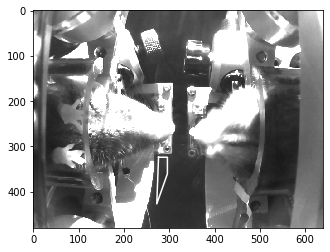

In [9]:
## RERUN for 20190815 and 20190821

for i in numpy.arange(1):#i in range(len(experiments)):
    for j in numpy.arange(1):#j in range(len(experiments[i]) - 1):
        try:
            answer = True
            EXP = direc.experiment(experiments[i][0], int(experiments[i][1+j]))

            subset_behaviour_file = direc.file(
                exp_folder=EXP,
                fname="interpolated",
                subfolder="Behaviour",
            )
            
            if experiments[i][0] == '20190822':
                HEIGHT = 240
                WIDTH = 320
            else:
                HEIGHT = 480
                WIDTH = 640
            
            ## load behavior frames
            behaviour_frames = vp.extract_RAW_frames(
                subset_behaviour_file,
                width=WIDTH,
                height=HEIGHT, 
                dtype='uint8',
                num_channels=1
            )
            
            
            ## draw roi
            %matplotlib qt
            plt.imshow(behaviour_frames[5000], cmap='gray', vmin=0, vmax=255)
            grad_roi = RoiPoly(color='w')

            %matplotlib inline
            plt.imshow(behaviour_frames[5000], cmap='gray', vmin=0, vmax=255)
            grad_roi.display_roi()            
            
            
            
            
            ## plot gradient signal
            grad_mask = grad_roi.get_mask(behaviour_frames[0])
            roi_gradient_signal = gaussian_filter(
                numpy.abs( numpy.gradient( numpy.mean(behaviour_frames[:, grad_mask], axis=1) ) ) ,20)
            
            signal_mean = numpy.mean(roi_gradient_signal)
            signal_std = numpy.std(roi_gradient_signal)
            
            
            
            while answer:
                SIGMA = easygui.enterbox('Enter value for SIGMA:')
                threshold = signal_mean + SIGMA*signal_std
                
                %matplotlib qt
                plt.figure()
                plt.plot(roi_gradient_signal)
                plt.axhline(threshold)
                answer = messagebox.askretrycancel("Question", "Do you want to try that again?")


                plt.close()

            
            

            
            
        except:
            print(experiments[i])








 ## Other Fun Testing

In [229]:
experiments = [['20190822', '3']]
%matplotlib inline


for i in range(len(experiments)):
    for j in range(len(experiments[i]) - 1):        
        if True:
            EXP = direc.experiment(experiments[i][0], int(experiments[i][1+j]))
            left_corrected_file = direc.file(
                exp_folder=EXP, 
                fname="left green 0.01-12.0Hz"
            )
            right_corrected_file = direc.file(
                exp_folder=EXP, 
                fname="right green 0.01-12.0Hz"
            )
            
            left_frames = vp.extract_RAW_frames(
                left_corrected_file,
                WIDTH,
                HEIGHT,
                num_channels=1,
                dtype='float32'
            )
            
            right_frames = vp.extract_RAW_frames(
                right_corrected_file,
                WIDTH,
                HEIGHT,
                num_channels=1,
                dtype='float32'
            )
            
            # truncate frames
            left_frames = left_frames[0:11898, :, :]
            right_frames = right_frames[0:11898, :, :]
            print(left_frames.shape)
            

(11898, 256, 256)


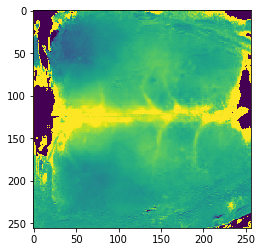

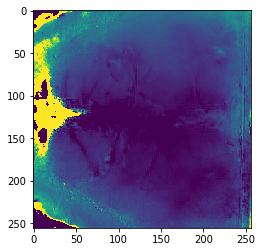

In [230]:
plt.figure()
plt.imshow(numpy.mean(left_frames[4000:7000,:,:],axis=0),cmap='viridis', vmin=-0.007, vmax=0.007)
plt.figure()
plt.imshow(numpy.mean(right_frames[4000:7000,:,:],axis=0),cmap='viridis', vmin=-0.002, vmax=0.01)

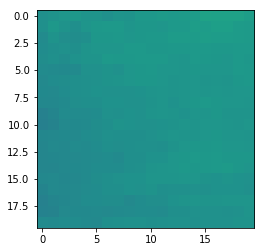

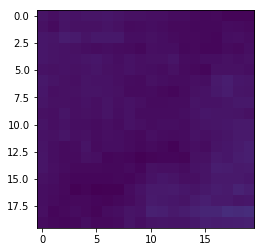

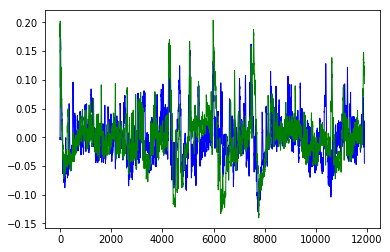

In [232]:
radius = 10
left_bc = left_frames[:,25-radius:25+radius, 80-radius:80+radius] 
right_bc = right_frames[:,220-radius:220+radius, 180-radius:180+radius]
plt.figure()
plt.imshow(numpy.mean(left_bc[4000:7000,:,:],axis=0),cmap='viridis', vmin=-0.007, vmax=0.007)
plt.figure()
plt.imshow(numpy.mean(right_bc[4000:7000,:,:],axis=0),cmap='viridis', vmin=-0.002, vmax=0.007)
plt.figure()
plt.plot(numpy.mean(left_bc,axis=(1,2)),'b',linewidth=1)
plt.plot(numpy.mean(right_bc,axis=(1,2)),'g',linewidth=1)

mean_left_bc = numpy.mean(left_bc,axis=(1,2))
mean_right_bc = numpy.mean(right_bc,axis=(1,2))

0.3590368330478668


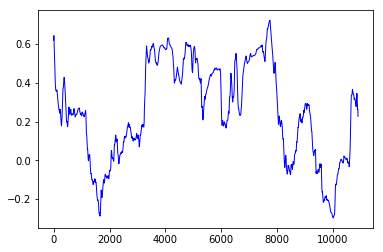

In [233]:
window_size = 1000
corr = numpy.empty([len(mean_left_bc)-window_size])

for j in range(len(corr)):
    corr[j] = 1 - correlation(
        mean_left_bc[j : j + window_size], mean_right_bc[j : j + window_size]
    )

print(corr[100])
plt.plot(corr,'b',linewidth=1)

# Create Frequency Split Correlation Files

In [172]:
# filter definition
def butter_bandpass_filter(
    data, cutoff_low, cutoff_high, fs, order=5
):
    b, a = butter_bandpass(
        cutoff_low, cutoff_high, fs, order=order
    )
    y = signal.lfilter(b, a, data)
    return y

def butter_bandpass(cutoff_low, cutoff_high, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff_low = cutoff_low / nyq
    normal_cutoff_high = cutoff_high / nyq
    Wn = [normal_cutoff_low, normal_cutoff_high]
    b, a = signal.butter(
        order, Wn, btype="bandpass", analog=False
    )
    return b, a

In [69]:
path = "D:/DualMouse/" # location of "date" folders

direc = lb.Data(path)

#FEMALES
#experiment_numbers = [1,2,3,4]
#dates = ['20190813','20190815','20190816'] #females only no mesh

experiment_numbers = [1,2,3,4,5,6,7,8,9]
#MALES
dates = ['20190729','20190808','20190821', '20190822'] #no females no mesh

#MESH
#dates = ['20190823', '20190826'] #mesh exp no females
#OPAQUE
dates = ['20190827','20190828']
dates = ['20190829']


#all
dates = ['20190729','20190808','20190813','20190815','20190816','20190821','20190822','201980823','20190826','20190827','20190828','20190829']
experiment_numbers = [1,2,3,4,5,6,7,8,9]

TRUE_FRAMERATE = 28.815

In [70]:
fs = TRUE_FRAMERATE
order = 3
# frequency_bands = (
#     0.01,
#     0.1,
#     0.5,
#     1.0,
#     2.0,
#     3.0,
#     4.0,
#     6.0,
#     8.0,
#     10.0,
#     12.0,
# )

frequency_bands = (
    0.025,
    0.2,
    0.5,
    1.0,
    2.0,
    3.0,
    4.0,
    6.0,
    8.0,
    10.0,
    12.0,
)

window_size = 864



for date in dates:
    for exp_num in experiment_numbers:        
        try:
            EXP = direc.experiment(date, exp_num)
            print(EXP)
            res = lb.Output(EXP)
            # load global signals
            left_gs_file = direc.file(exp_folder=EXP, fname="left global")              
            right_gs_file = direc.file(exp_folder=EXP, fname="right global")
            l_global_signal = numpy.load(left_gs_file)
            r_global_signal = numpy.load(right_gs_file)
            print(left_gs_file)
            print(right_gs_file)
    
            total_bins = l_global_signal.shape[0] - window_size
            correlation_image = numpy.zeros(          # Make empty array we will now populate
                (len(frequency_bands) - 1, total_bins)
            )
            
            og_s1 = numpy.copy(l_global_signal[:,0])  # select full temporal means
            og_s2 = numpy.copy(r_global_signal[:,0]) 

            frequency_labels = []
            for i, (low, high) in enumerate(zip(frequency_bands, frequency_bands[1:])):
                frequency_labels.append(
                    str(low) + "-" + str(high) + "Hz"
                )
                s1 = butter_bandpass_filter(
                    og_s1, low, high, fs, order
                )
                s2 = butter_bandpass_filter(
                    og_s2, low, high, fs, order
                )
                # correlation inside moving window at current frequency band
                for j in range(len(s1) - window_size):
                    correlation_image[i, j] = 1 - correlation(
                        s1[j : j + window_size], s2[j : j + window_size]
                    )

            correlation_image_fname = res.saveas(
                f_out=correlation_image,
                suffix='frequency_split_correlation_filtered_ws={}'.format(window_size),
                ftype='npy',
                save=True,
            )
#             plt.figure(figsize=(8, 8))
#             plt.title(
#                 "Moving correlation vs. different frequency bands ({}-{})".format(dates, experiment_numbers)
#             )
#             y_ticks = numpy.arange(numpy.shape(mean_correlation_heatmap)[0])+0.5
#             y_ticks = numpy.flipud(y_ticks)
#             plt.imshow(
#                 correlation_image, 
#                 cmap='viridis', 
#                 extent=[0,413,0,13],
#                 aspect='auto', 
#                 vmin=-1, 
#                 vmax=1
#             )
#             plt.yticks(y_ticks, frequency_labels)
#             plt.colorbar()
        except:
            print("either no experiment %d in folder %s, or the calculation failed" % (exp_num,date))

D:\DualMouse\20190729\Experiment_1
D:\DualMouse\20190729\Experiment_1\Derivatives\l_global_signal.npy
D:\DualMouse\20190729\Experiment_1\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=864.npy
D:\DualMouse\20190729\Experiment_2
D:\DualMouse\20190729\Experiment_2\Derivatives\l_global_signal.npy
D:\DualMouse\20190729\Experiment_2\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=864.npy
D:\DualMouse\20190729\Experiment_3
D:\DualMouse\20190729\Experiment_3\Derivatives\l_global_signal.npy
D:\DualMouse\20190729\Experiment_3\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=864.npy
D:\DualMouse\20190729\Experiment_4
D:\DualMouse\20190729\Experiment_4\Derivatives\l_global_signal.npy
D:\DualMouse\20190729\Experiment_4\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=864.npy
either no experiment 5 in folder 20190729, or the calculation failed
either no experiment 6 in f

Saved as frequency_split_correlation_filtered_ws=864.npy
D:\DualMouse\20190826\Experiment_2
D:\DualMouse\20190826\Experiment_2\Derivatives\l_global_signal.npy
D:\DualMouse\20190826\Experiment_2\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=864.npy
D:\DualMouse\20190826\Experiment_3
D:\DualMouse\20190826\Experiment_3\Derivatives\l_global_signal.npy
D:\DualMouse\20190826\Experiment_3\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=864.npy
D:\DualMouse\20190826\Experiment_4
D:\DualMouse\20190826\Experiment_4\Derivatives\l_global_signal.npy
D:\DualMouse\20190826\Experiment_4\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=864.npy
D:\DualMouse\20190826\Experiment_5
D:\DualMouse\20190826\Experiment_5\Derivatives\l_global_signal.npy
D:\DualMouse\20190826\Experiment_5\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=864.npy
D:\DualMouse\20190826\Experiment_6
D:\D

# Trial Shuffling

In [2]:
# filter definition
def butter_bandpass_filter(
    data, cutoff_low, cutoff_high, fs, order=5
):
    b, a = butter_bandpass(
        cutoff_low, cutoff_high, fs, order=order
    )
    y = signal.lfilter(b, a, data)
    return y

def butter_bandpass(cutoff_low, cutoff_high, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff_low = cutoff_low / nyq
    normal_cutoff_high = cutoff_high / nyq
    Wn = [normal_cutoff_low, normal_cutoff_high]
    b, a = signal.butter(
        order, Wn, btype="bandpass", analog=False
    )
    return b, a

In [92]:
path = "D:/DualMouse/" # location of "date" folders

direc = lb.Data(path)

#ALL MALES NORMAL EXPERIMENTS
# experiments = [['20190729', '1','2','3','4'],
#                ['20190808','1','2','3','4','5','6','7','8'],
#                ['20190821','1'],
#                ['20190822','1','2','3','4'],
#                ['20190829','2','4','6','8']]

#MESH
# experiments = [['20190823', '1','2','3','4','5','6','7','8'],
#               ['20190826','1','2','3','4','5','6'],
#               ['20190829','3','5']]
#OPAQUE
experiments = [['20190827', '1','2','3','4'],
              ['20190828','1','2','3','4','5','6','7','8','9'],
              ['20190829','1','7']]

#all
#dates = ['20190808','20190813','20190815','20190816','20190821','20190822','201980823','20190826']
#experiment_numbers = [1,2,3,4,5,6,7,8]


TRUE_FRAMERATE = 28.815

In [93]:
fs = TRUE_FRAMERATE
order = 3

window_size = 864


l_global_signals = numpy.empty([0,11898,1])
r_global_signals = numpy.empty([0,11898,1])

for i in range(len(experiments)):
    for j in range(len(experiments[i])-1):        
        try:
            EXP = direc.experiment(experiments[i][0], int(experiments[i][1+j]))
            print(EXP)
#             res = lb.Output(EXP)
            # load global signals
            left_gs_file = direc.file(exp_folder=EXP, fname="left global")              
            right_gs_file = direc.file(exp_folder=EXP, fname="right global")
            l_global_signal = numpy.load(left_gs_file)
            r_global_signal = numpy.load(right_gs_file)
            
            
            l_trunc = l_global_signal[None, 0:l_global_signals.shape[1], :]
            r_trunc = r_global_signal[None, 0:r_global_signals.shape[1], :]
            
            l_global_signals = numpy.concatenate((l_global_signals,l_trunc), axis = 0)
            r_global_signals = numpy.concatenate((r_global_signals,r_trunc), axis = 0)
        except:
            print("either no experiment %d in folder %s, or the calculation failed" % (exp_num,date))
print("done loading global signals")

D:\DualMouse\20190827\Experiment_1
D:\DualMouse\20190827\Experiment_2
D:\DualMouse\20190827\Experiment_3
D:\DualMouse\20190827\Experiment_4
D:\DualMouse\20190828\Experiment_1
D:\DualMouse\20190828\Experiment_2
D:\DualMouse\20190828\Experiment_3
D:\DualMouse\20190828\Experiment_4
D:\DualMouse\20190828\Experiment_5
D:\DualMouse\20190828\Experiment_6
D:\DualMouse\20190828\Experiment_7
D:\DualMouse\20190828\Experiment_8
D:\DualMouse\20190828\Experiment_9
D:\DualMouse\20190829\Experiment_1
D:\DualMouse\20190829\Experiment_7
done loading global signals


In [94]:
combinations = int(l_global_signals.shape[0] * (l_global_signals.shape[0]-1)) #NJM 20190916

first_separation_correlation = numpy.empty([combinations])
together_correlation = numpy.empty([combinations])
second_separation_correlation = numpy.empty([combinations])

first_separation_correlation_actual_pair = numpy.empty([l_global_signals.shape[0]])
together_correlation_actual_pair = numpy.empty([l_global_signals.shape[0]])
second_separation_correlation_actual_pair = numpy.empty([l_global_signals.shape[0]])

# correlation_low = 0.025 # 0.01
# correlation_high = 0.125 # 0.1


seg_1_s = 300
seg_1_f = 3300

seg_2_s = 4400
seg_2_f = 7400

seg_3_s = 8700
seg_3_f = 11700


interaction_start = 4250
interaction_end = 7700

actual_correlations = numpy.empty(
    [l_global_signals.shape[0], 11898-window_size])


window_size = int(30*TRUE_FRAMERATE)

# actual correlations between together experiments
for i in range(0,l_global_signals.shape[0]):
    s1 = numpy.copy(l_global_signals[i,:])
    s2 = numpy.copy(r_global_signals[i,:])
    
    for j in range(len(s1) - window_size):
        actual_correlations[i, j] = 1 - correlation(
            s1[j : j + window_size], s2[j : j + window_size]
        )
            
    first_separation_correlation_actual_pair[i] = 1 - correlation(
                s1[seg_1_s : seg_1_f], s2[seg_1_s : seg_1_f])
    together_correlation_actual_pair[i] = 1 - correlation(
                s1[seg_2_s : seg_2_f], s2[seg_2_s : seg_2_f])
    second_separation_correlation_actual_pair[i] = 1 - correlation(
                s1[seg_3_s : seg_3_f], s2[seg_3_s : seg_3_f])
    
print(first_separation_correlation_actual_pair)
print(together_correlation_actual_pair)
print(second_separation_correlation_actual_pair)
    

# shuffled correlations
count = 0
shuffled_correlation_heatmaps = numpy.empty(
    [combinations, 11898-window_size])

for y in range(0,l_global_signals.shape[0]):
    for x in range(0,l_global_signals.shape[0] - 1):
        pair = (y+x+1)%(l_global_signals.shape[0])
        print("currently running experiment L: %d with experiment R: %d" %(y, pair))
        
        s1 = numpy.copy(l_global_signals[y,:])
        s2 = numpy.copy(r_global_signals[pair,:])
            
        first_separation_correlation[count] = 1 - correlation(
                    s1[seg_1_s : seg_1_f], s2[seg_1_s : seg_1_f])
        together_correlation[count] = 1 - correlation(
                    s1[seg_2_s : seg_2_f], s2[seg_2_s : seg_2_f])
        second_separation_correlation[count] = 1 - correlation(
                    s1[seg_3_s : seg_3_f], s2[seg_3_s : seg_3_f])
        
        
        print("First separation correlation: %8.2f, Together correlation: %8.2f, Second separation correlation: %8.2f" 
              % (first_separation_correlation[count],together_correlation[count],second_separation_correlation[count]))
        

        # correlation inside moving window at current frequency band
        for j in range(len(s1) - window_size):
            shuffled_correlation_heatmaps[count, j] = 1 - correlation(
                s1[j : j + window_size], s2[j : j + window_size]
            )
        
        count+=1
print("done")


[ 0.25801842 -0.11174117 -0.04390735  0.18024913 -0.09265853 -0.05957016
 -0.09193536  0.10252757  0.38464193 -0.03571428  0.12200781 -0.12818898
 -0.08030913  0.36647832 -0.10313286]
[-0.10388347  0.01094965  0.26213108 -0.16641688 -0.1122774  -0.09157318
  0.07061541 -0.00911739 -0.17421065  0.14296928  0.30195278  0.1181881
  0.01849365  0.19285841 -0.19611096]
[ 0.36872756 -0.1227297   0.03294619  0.1992439   0.11617797 -0.1264445
 -0.04051623  0.15344221 -0.0182602  -0.10157    -0.13325931  0.04015595
 -0.10172058 -0.0696708  -0.20040791]
currently running experiment L: 0 with experiment R: 1
First separation correlation:     0.18, Together correlation:    -0.12, Second separation correlation:     0.40
currently running experiment L: 0 with experiment R: 2
First separation correlation:    -0.08, Together correlation:    -0.14, Second separation correlation:     0.16
currently running experiment L: 0 with experiment R: 3
First separation correlation:     0.31, Together correlation:

currently running experiment L: 3 with experiment R: 8
First separation correlation:    -0.03, Together correlation:     0.17, Second separation correlation:    -0.01
currently running experiment L: 3 with experiment R: 9
First separation correlation:    -0.05, Together correlation:     0.08, Second separation correlation:     0.00
currently running experiment L: 3 with experiment R: 10
First separation correlation:     0.09, Together correlation:     0.01, Second separation correlation:     0.03
currently running experiment L: 3 with experiment R: 11
First separation correlation:    -0.05, Together correlation:    -0.18, Second separation correlation:     0.24
currently running experiment L: 3 with experiment R: 12
First separation correlation:    -0.07, Together correlation:    -0.02, Second separation correlation:     0.16
currently running experiment L: 3 with experiment R: 13
First separation correlation:    -0.10, Together correlation:     0.03, Second separation correlation:    

currently running experiment L: 6 with experiment R: 3
First separation correlation:     0.07, Together correlation:    -0.07, Second separation correlation:    -0.11
currently running experiment L: 6 with experiment R: 4
First separation correlation:     0.14, Together correlation:     0.24, Second separation correlation:     0.11
currently running experiment L: 6 with experiment R: 5
First separation correlation:     0.09, Together correlation:    -0.06, Second separation correlation:    -0.12
currently running experiment L: 7 with experiment R: 8
First separation correlation:     0.26, Together correlation:    -0.02, Second separation correlation:     0.10
currently running experiment L: 7 with experiment R: 9
First separation correlation:     0.11, Together correlation:    -0.18, Second separation correlation:    -0.11
currently running experiment L: 7 with experiment R: 10
First separation correlation:     0.13, Together correlation:     0.14, Second separation correlation:     0.

currently running experiment L: 10 with experiment R: 0
First separation correlation:     0.19, Together correlation:     0.28, Second separation correlation:     0.25
currently running experiment L: 10 with experiment R: 1
First separation correlation:     0.35, Together correlation:     0.06, Second separation correlation:    -0.08
currently running experiment L: 10 with experiment R: 2
First separation correlation:     0.02, Together correlation:     0.38, Second separation correlation:     0.11
currently running experiment L: 10 with experiment R: 3
First separation correlation:     0.17, Together correlation:     0.13, Second separation correlation:    -0.04
currently running experiment L: 10 with experiment R: 4
First separation correlation:    -0.05, Together correlation:     0.03, Second separation correlation:    -0.22
currently running experiment L: 10 with experiment R: 5
First separation correlation:     0.07, Together correlation:     0.32, Second separation correlation:  

currently running experiment L: 13 with experiment R: 10
First separation correlation:    -0.00, Together correlation:     0.38, Second separation correlation:     0.04
currently running experiment L: 13 with experiment R: 11
First separation correlation:     0.04, Together correlation:    -0.03, Second separation correlation:    -0.14
currently running experiment L: 13 with experiment R: 12
First separation correlation:    -0.13, Together correlation:     0.21, Second separation correlation:    -0.10
currently running experiment L: 14 with experiment R: 0
First separation correlation:    -0.25, Together correlation:     0.02, Second separation correlation:    -0.22
currently running experiment L: 14 with experiment R: 1
First separation correlation:    -0.17, Together correlation:     0.27, Second separation correlation:    -0.07
currently running experiment L: 14 with experiment R: 2
First separation correlation:    -0.03, Together correlation:    -0.11, Second separation correlation

In [96]:
shuffle_correction = numpy.mean(shuffled_correlation_heatmaps,axis=0)
actual_correlations_corrected = numpy.subtract(actual_correlations,shuffle_correction)
print(actual_correlations_corrected.shape)
print(shuffle_correction.shape)


plt.figure()
plt.plot(numpy.mean(actual_correlations,axis=0))
plt.plot(shuffle_correction)
plt.figure()
plt.plot(numpy.mean(actual_correlations_corrected,axis=0))
plt.plot(numpy.mean(actual_correlations,axis=0)-shuffle_correction)
# import os 

actual_correlations_save_file = os.path.join(path, 'all_male_global_signal_correlations_unfiltered_30s_opaque')
shuffled_correlations_save_file = os.path.join(path, 'all_male_global_signal_correlations_unfiltered_30s_shuffled_opaque')

numpy.save(actual_correlations_save_file, actual_correlations)
numpy.save(shuffled_correlations_save_file, shuffled_correlation_heatmaps)

# plt.figure()
# plt.plot(numpy.transpose(actual_correlations))
# plt.figure()
# plt.plot(numpy.transpose(shuffled_correlation_heatmaps))

(15, 11034)
(11034,)


In [122]:
# frequency_bands = (
#     0.025,
#     0.2,
#     0.5,
#     1.0,
#     2.0,
#     3.0,
#     4.0,
#     6.0,
#     8.0,
#     10.0,
#     12.0,
# )

combinations = int((l_global_signals.shape[0] * (l_global_signals.shape[0]-1))/2)
combinations = int(l_global_signals.shape[0] * l_global_signals.shape[0])

combinations = int(l_global_signals.shape[0] * (l_global_signals.shape[0]-1)) #NJM 20190916

first_separation_correlation = numpy.empty([combinations])
together_correlation = numpy.empty([combinations])
second_separation_correlation = numpy.empty([combinations])

first_separation_correlation_actual_pair = numpy.empty([l_global_signals.shape[0]])
together_correlation_actual_pair = numpy.empty([l_global_signals.shape[0]])
second_separation_correlation_actual_pair = numpy.empty([l_global_signals.shape[0]])

correlation_low = 0.025 # 0.01
correlation_high = 0.125 # 0.1


seg_1_s = 300
seg_1_f = 3300

seg_2_s = 4400
seg_2_f = 7400

seg_3_s = 8700
seg_3_f = 11700


interaction_start = 4250
interaction_end = 7700

correlation_heatmaps = numpy.empty(
    [len(frequency_bands)-1, 11898-window_size, combinations])

count = 0

for i in range(0,l_global_signals.shape[0]):
    left_gs = l_global_signals[i]
    right_gs = r_global_signals[i]
    og_s1 = numpy.copy(left_gs[:,0])  # select full temporal means
    og_s2 = numpy.copy(right_gs[:,0])
    
    s1 = butter_bandpass_filter(
        og_s1, correlation_low, correlation_high, fs, order
    )
    s2 = butter_bandpass_filter(
        og_s2, correlation_low, correlation_high, fs, order
    )
            
    first_separation_correlation_actual_pair[i] = 1 - correlation(
                s1[seg_1_s : seg_1_f], s2[seg_1_s : seg_1_f])
    together_correlation_actual_pair[i] = 1 - correlation(
                s1[seg_2_s : seg_2_f], s2[seg_2_s : seg_2_f])
    second_separation_correlation_actual_pair[i] = 1 - correlation(
                s1[seg_3_s : seg_3_f], s2[seg_3_s : seg_3_f])
    
print(first_separation_correlation_actual_pair)
print(together_correlation_actual_pair)
print(second_separation_correlation_actual_pair)
    
    
for y in range(0,l_global_signals.shape[0]):
    for x in range(0,l_global_signals.shape[0] - 1):
        pair = (y+x+1)%(l_global_signals.shape[0])
        print("currently running experiment L: %d with experiment R: %d" %(y, pair))
        
        left_gs = l_global_signals[y]
        right_gs = r_global_signals[pair]
        
        og_s1 = numpy.copy(left_gs[:,0])  # select full temporal means
        og_s2 = numpy.copy(right_gs[:,0]) 
        
        s1 = butter_bandpass_filter(
            og_s1, correlation_low, correlation_high, fs, order
        )
        s2 = butter_bandpass_filter(
            og_s2, correlation_low, correlation_high, fs, order
        )
            
        first_separation_correlation[count] = 1 - correlation(
                    s1[seg_1_s : seg_1_f], s2[seg_1_s : seg_1_f])
        together_correlation[count] = 1 - correlation(
                    s1[seg_2_s : seg_2_f], s2[seg_2_s : seg_2_f])
        second_separation_correlation[count] = 1 - correlation(
                    s1[seg_3_s : seg_3_f], s2[seg_3_s : seg_3_f])
        
        
        print("First separation correlation: %8.2f, Together correlation: %8.2f, Second separation correlation: %8.2f" 
              % (first_separation_correlation[count],together_correlation[count],second_separation_correlation[count]))
        
        frequency_labels = []
        for i, (low, high) in enumerate(zip(frequency_bands, frequency_bands[1:])):
            frequency_labels.append(
                str(low) + "-" + str(high) + "Hz"
            )
            s1 = butter_bandpass_filter(
                og_s1, low, high, fs, order
            )
            s2 = butter_bandpass_filter(
                og_s2, low, high, fs, order
            )
            # correlation inside moving window at current frequency band
            for j in range(len(s1) - window_size):
                correlation_heatmaps[i, j, count] = 1 - correlation(
                    s1[j : j + window_size], s2[j : j + window_size]
                )
        
        count+=1
print("done")


[ 0.44485728 -0.08741825 -0.01097521  0.28836531 -0.17117007 -0.14633818
 -0.16979011 -0.05054133  0.55525209 -0.19332431 -0.02474856 -0.09240958
  0.12925627  0.47514437 -0.02708013]
[-0.19875765 -0.0459214   0.10974877 -0.23308804  0.13650856  0.25405496
  0.21689724  0.00355936 -0.27259044  0.2869322   0.22976078  0.30837724
  0.1377929   0.20598137 -0.11832966]
[ 0.24703962 -0.21078782 -0.16176465  0.67883991  0.16872583 -0.16094475
 -0.1646206   0.00850615 -0.02266062 -0.2579261  -0.22696655  0.15812323
 -0.05713503 -0.04359379  0.01235682]
currently running experiment L: 0 with experiment R: 1
First separation correlation:    -0.06, Together correlation:    -0.24, Second separation correlation:    -0.13
currently running experiment L: 0 with experiment R: 2
First separation correlation:    -0.21, Together correlation:    -0.21, Second separation correlation:     0.06
currently running experiment L: 0 with experiment R: 3
First separation correlation:     0.48, Together correlatio

currently running experiment L: 3 with experiment R: 8
First separation correlation:     0.08, Together correlation:     0.30, Second separation correlation:     0.14
currently running experiment L: 3 with experiment R: 9
First separation correlation:    -0.08, Together correlation:    -0.07, Second separation correlation:    -0.11
currently running experiment L: 3 with experiment R: 10
First separation correlation:     0.03, Together correlation:    -0.04, Second separation correlation:    -0.06
currently running experiment L: 3 with experiment R: 11
First separation correlation:    -0.06, Together correlation:    -0.13, Second separation correlation:     0.62
currently running experiment L: 3 with experiment R: 12
First separation correlation:    -0.15, Together correlation:    -0.13, Second separation correlation:     0.25
currently running experiment L: 3 with experiment R: 13
First separation correlation:    -0.02, Together correlation:     0.12, Second separation correlation:    

currently running experiment L: 6 with experiment R: 3
First separation correlation:     0.26, Together correlation:    -0.01, Second separation correlation:     0.01
currently running experiment L: 6 with experiment R: 4
First separation correlation:    -0.01, Together correlation:     0.44, Second separation correlation:     0.41
currently running experiment L: 6 with experiment R: 5
First separation correlation:     0.19, Together correlation:    -0.21, Second separation correlation:     0.03
currently running experiment L: 7 with experiment R: 8
First separation correlation:     0.47, Together correlation:     0.14, Second separation correlation:     0.13
currently running experiment L: 7 with experiment R: 9
First separation correlation:     0.24, Together correlation:    -0.16, Second separation correlation:    -0.15
currently running experiment L: 7 with experiment R: 10
First separation correlation:     0.18, Together correlation:    -0.10, Second separation correlation:     0.

currently running experiment L: 10 with experiment R: 0
First separation correlation:     0.05, Together correlation:     0.31, Second separation correlation:     0.34
currently running experiment L: 10 with experiment R: 1
First separation correlation:     0.61, Together correlation:     0.21, Second separation correlation:    -0.05
currently running experiment L: 10 with experiment R: 2
First separation correlation:    -0.06, Together correlation:     0.46, Second separation correlation:    -0.26
currently running experiment L: 10 with experiment R: 3
First separation correlation:     0.18, Together correlation:     0.36, Second separation correlation:     0.06
currently running experiment L: 10 with experiment R: 4
First separation correlation:     0.02, Together correlation:    -0.02, Second separation correlation:     0.06
currently running experiment L: 10 with experiment R: 5
First separation correlation:     0.31, Together correlation:     0.31, Second separation correlation:  

currently running experiment L: 13 with experiment R: 10
First separation correlation:     0.06, Together correlation:     0.47, Second separation correlation:     0.07
currently running experiment L: 13 with experiment R: 11
First separation correlation:    -0.10, Together correlation:     0.23, Second separation correlation:    -0.07
currently running experiment L: 13 with experiment R: 12
First separation correlation:     0.04, Together correlation:     0.01, Second separation correlation:    -0.12
currently running experiment L: 14 with experiment R: 0
First separation correlation:    -0.25, Together correlation:    -0.04, Second separation correlation:    -0.16
currently running experiment L: 14 with experiment R: 1
First separation correlation:    -0.15, Together correlation:     0.40, Second separation correlation:    -0.50
currently running experiment L: 14 with experiment R: 2
First separation correlation:     0.20, Together correlation:     0.16, Second separation correlation

In [123]:
print(correlation_heatmaps.shape)

(10, 10398, 225)


([<matplotlib.axis.XTick at 0x172661eb5c0>,
 <a list of 6 Text xticklabel objects>)

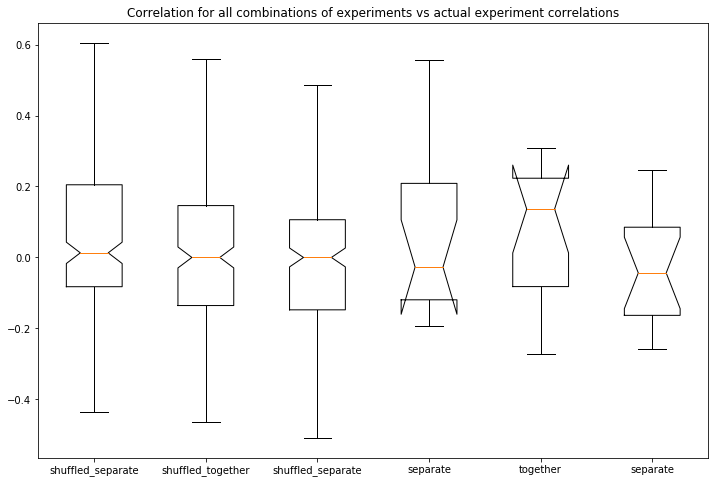

In [124]:
plt.figure(figsize=(12, 8))
plt.title(
    "Correlation for all combinations of experiments vs actual experiment correlations"
)

data = [first_separation_correlation,together_correlation,second_separation_correlation ,
        first_separation_correlation_actual_pair, together_correlation_actual_pair, second_separation_correlation_actual_pair]

plt.boxplot(data,notch = True,showfliers=False)
plt.xticks([1, 2, 3, 4, 5, 6], ['shuffled_separate', 'shuffled_together', 'shuffled_separate', 'separate' ,'together', 'separate'])
#plt.savefig("D:/DualMouse/Plot_Correlations_yes_mesh_no_fem_segment3000f_0.025-0.125.png",dpi = 100, facecol = 'white', format = 'png')

[107 159 109  66 163  97 156 160  84 131  94  12  69 191  92 174  46 143
 122 180 215  48 106 203 138  55  58 167]
(10, 10398)


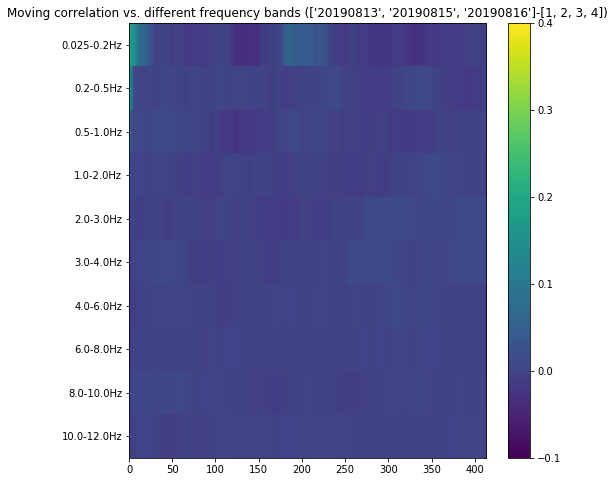

In [125]:
n = 28
index = numpy.random.choice(correlation_heatmaps.shape[2], n, replace=False)
print(index)
random_heatmaps = correlation_heatmaps[:,:,index]

mean_correlation_heatmap = numpy.mean(correlation_heatmaps, axis=2)
print(mean_correlation_heatmap.shape)
plt.figure(figsize=(8, 8))
plt.title(
    "Moving correlation vs. different frequency bands ({}-{})".format(dates, experiment_numbers)
)
y_ticks = numpy.arange(numpy.shape(mean_correlation_heatmap)[0])+0.5
y_ticks = numpy.flipud(y_ticks)
plt.imshow(
    mean_correlation_heatmap, 
    cmap='viridis', 
    extent=[0,413,0,10],
    aspect='auto', 
    vmin=-0.1, 
    vmax=0.4
)
plt.yticks(y_ticks, frequency_labels)
plt.colorbar()

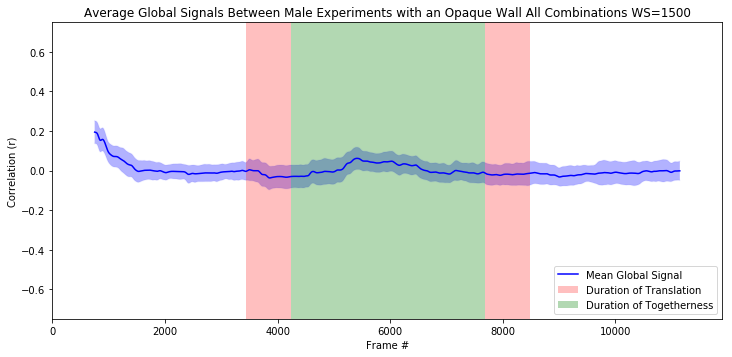

In [126]:
together_duration = 120
translation_duration = 27.5
first_translation = 119.5

TRUE_FRAMERATE = 28.815

start_first_translation = numpy.round(numpy.multiply(first_translation, TRUE_FRAMERATE))
end_first_translation = numpy.round(numpy.multiply(first_translation + translation_duration, TRUE_FRAMERATE))

start_interaction = numpy.round(numpy.multiply(first_translation + translation_duration, TRUE_FRAMERATE))
end_interaction = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration, TRUE_FRAMERATE))

start_second_translation = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration, TRUE_FRAMERATE))
end_second_translation = numpy.round(numpy.multiply(first_translation + translation_duration+together_duration+translation_duration, TRUE_FRAMERATE))


gs = mean_correlation_heatmap[0]
plt.figure(figsize=(12, 12))
plt.subplot(211)

corrs = []
for i in range(int(window_size/2)):
    corrs.append(float('nan'))
for i in range(len(gs)):
    corrs.append(gs[i])
for i in range(int(window_size/2)):
    corrs.append(float('nan'))
    
std_gs = std_correlation_heatmap[0]
stds = []
for i in range(int(window_size/2)):
    stds.append(float('nan'))
for i in range(len(std_gs)):
    stds.append(std_gs[i])
for i in range(int(window_size/2)):
    stds.append(float('nan'))

corr_x_axis = numpy.linspace(
    0, len(corrs), len(corrs)
)

plt.axvspan(
    start_first_translation,
    end_first_translation,
    facecolor="r",
    alpha=0.25,
    label="Duration of Translation",
)
plt.axvspan(
    start_second_translation,
    end_second_translation,
    facecolor="r",
    alpha=0.25,
    #label="Duration of Translation",
)
plt.axvspan(
    start_interaction,
    end_interaction,
    facecolor="g",
    alpha=0.3,
    label="Duration of Togetherness",
)

stds = numpy.divide(stds,numpy.sqrt(correlation_heatmap.shape[2]))
scors = numpy.add(stds, corrs)
scors2 = numpy.subtract(corrs, stds)
plt.plot(corrs, "b", label="Mean Global Signal")
plt.plot(scors, 'b', alpha = 0.05)
plt.plot(scors2, 'b', alpha = 0.05)

plt.fill_between(corr_x_axis,scors2,scors,facecolor='blue',alpha=0.3)


plt.xlim(0, len(corrs))
plt.ylim(-0.75,0.75)

plt.xlabel("Frame #")
plt.ylabel("Correlation (r)")
plt.title("Average Global Signals Between Male Experiments with an Opaque Wall All Combinations WS=1500")
plt.legend(loc=4, prop={'size': 10})
plt.savefig("D:/DualMouse/Correlation_ws1500_males_opaque_shuffled.png",dpi = 100, transparent=True, format = 'png')

# Trial Shuffling 20190808

In [ ]:
date = '20190808'
experiment_numbers = [1, 2, 3, 4, 5, 6, 7, 8]

# filter parameters
fs = TRUE_FRAMERATE
order = 3
frequency_bands = (
    0.01,
    0.1,
    0.5,
    1.0,
    2.0,
    3.0,
    4.0,
    6.0,
    8.0,
    10.0,
    12.0,
)

# filter definition
def butter_bandpass_filter(
    data, cutoff_low, cutoff_high, fs, order=5
):
    b, a = butter_bandpass(
        cutoff_low, cutoff_high, fs, order=order
    )
    y = signal.lfilter(b, a, data)
    return y

def butter_bandpass(cutoff_low, cutoff_high, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff_low = cutoff_low / nyq
    normal_cutoff_high = cutoff_high / nyq
    Wn = [normal_cutoff_low, normal_cutoff_high]
    b, a = signal.butter(
        order, Wn, btype="bandpass", analog=False
    )
    return b, a

# initialize correlation parameters
window_size = 1000
correlation_heatmap = numpy.empty(
    [len(frequency_bands)-1, 11956-window_size, len(experiment_numbers)])


# set up flag for shuffling trials while maintaining mouse pairs
# note the following experiments use same mouse pairs 
# date: 20190808 experiments: (1,2), (3,4), (5,6), (7,8)
flag =  1

for exp_num in experiment_numbers:      
    
    # shuffle trials
    EXP_left = direc.experiment(date, exp_num)
    EXP_right = direc.experiment(date, exp_num + flag)
    
    # load global signals
    left_gs_file = direc.file(exp_folder=EXP_left, fname="left global")              
    right_gs_file = direc.file(exp_folder=EXP_right, fname="right global")
    left_gs = numpy.load(left_gs_file)
    right_gs = numpy.load(right_gs_file)
    
    # make sure signals are same length
    left_gs = left_gs[0:11956, 0]
    right_gs = right_gs[0:11956, 0]
    
#     plt.figure()
#     plt.plot(left_gs)
#     plt.plot(right_gs)
#     throwerrorhere
    
    # filter global signals
    frequency_labels = []
#     plt.figure()
    for i, (low, high) in enumerate(zip(frequency_bands, frequency_bands[1:])):
        frequency_labels.append(
            str(low) + "-" + str(high) + "Hz"
        )
        s1 = butter_bandpass_filter(
            left_gs, low, high, fs, order
        )
        s2 = butter_bandpass_filter(
            right_gs, low, high, fs, order
        )
        


#         plt.plot(s1)


#         print(low)
#         print(high)
#         print(1 - correlation(s1, s2))
#         del s1, s2
        
        # correlation inside moving window at current frequency band
        for j in range(len(s1) - window_size):
            correlation_heatmap[i, j, exp_num-1] = 1 - correlation(
                s1[j : j + window_size], s2[j : j + window_size])
   
    # switch flag
    flag = -flag
    


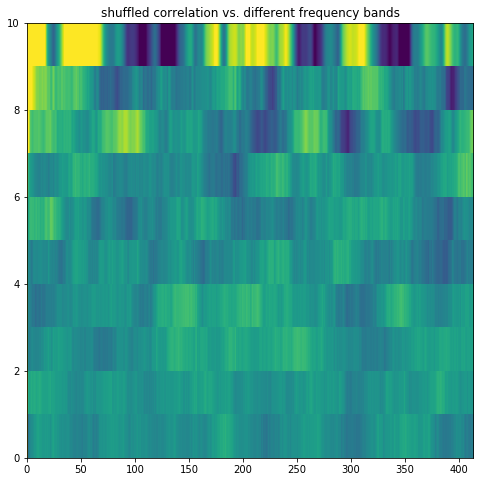

In [24]:
mean_correlation_heatmap = numpy.mean(correlation_heatmap, axis=2)
y_ticks = numpy.arange(mean_correlation_heatmap.shape[0])+0.5
y_ticks = numpy.flipud(y_ticks)
plt.figure(figsize=(8, 8))
plt.title("shuffled correlation vs. different frequency bands")
plt.imshow(
    mean_correlation_heatmap, 
    cmap='viridis', 
    extent=[0,413,0,10],
    aspect='auto', 
    vmin=-0.2, 
    vmax=0.2
)

## Scrap

In [181]:
import os
fname = 'left gsr'
dd = os.path.join(EXP, "")  
for root, dirs, files in os.walk(dd):
    for f in files:
        if 'gsr' in f and fname == 'left gsr':
            print(str(os.path.join(root, f)))

B:\Dual\20190808\Experiment_1\Derivatives\left_mouse_gsr_frames.raw
B:\Dual\20190808\Experiment_1\Derivatives\right_mouse_gsr_frames.raw


In [342]:
path = "D:/DualMouse/" # location of "date" folders

direc = lb.Data(path)

#dates = ['20190808','20190813','20190815','20190821','20190822','20190823']
#dates = ['20190808','20190813','20190821','20190822']
dates = ['20190823']
# experiment_numbers = [1, 2, 3, 4, 5, 6, 7, 8]
# experiment_numbers = [1, 3, 5, 7]
# experiment_numbers = [2, 4, 6, 8]
experiment_numbers = [1,2,3,4,5,6,7,8]


TRUE_FRAMERATE = 28.815

In [216]:
# filter definition
def butter_bandpass_filter(
    data, cutoff_low, cutoff_high, fs, order=5
):
    b, a = butter_bandpass(
        cutoff_low, cutoff_high, fs, order=order
    )
    y = signal.lfilter(b, a, data)
    return y

def butter_bandpass(cutoff_low, cutoff_high, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff_low = cutoff_low / nyq
    normal_cutoff_high = cutoff_high / nyq
    Wn = [normal_cutoff_low, normal_cutoff_high]
    b, a = signal.butter(
        order, Wn, btype="bandpass", analog=False
    )
    return b, a

In [343]:
fs = TRUE_FRAMERATE
order = 3
frequency_bands = (
    0.01,
    0.1,
    0.5,
    1.0,
    2.0,
    3.0,
    4.0,
    6.0,
    8.0,
    10.0,
    12.0,
)

window_size = 1500



for date in dates:
    for exp_num in experiment_numbers:        
        try:
            EXP = direc.experiment(date, exp_num)
            print(EXP)
            res = lb.Output(EXP)
            # load global signals
            left_gs_file = direc.file(exp_folder=EXP, fname="left global")              
            right_gs_file = direc.file(exp_folder=EXP, fname="right global")
            l_global_signal = numpy.load(left_gs_file)
            r_global_signal = numpy.load(right_gs_file)
            print(left_gs_file)
            print(right_gs_file)
    
            total_bins = l_global_signal.shape[0] - window_size
            correlation_image = numpy.zeros(          # Make empty array we will now populate
                (len(frequency_bands) - 1, total_bins)
            )
            
            og_s1 = numpy.copy(l_global_signal[:,0])  # select full temporal means
            og_s2 = numpy.copy(r_global_signal[:,0]) 

            frequency_labels = []
            for i, (low, high) in enumerate(zip(frequency_bands, frequency_bands[1:])):
                frequency_labels.append(
                    str(low) + "-" + str(high) + "Hz"
                )
                s1 = butter_bandpass_filter(
                    og_s1, low, high, fs, order
                )
                s2 = butter_bandpass_filter(
                    og_s2, low, high, fs, order
                )
                # correlation inside moving window at current frequency band
                for j in range(len(s1) - window_size):
                    correlation_image[i, j] = 1 - correlation(
                        s1[j : j + window_size], s2[j : j + window_size]
                    )

            correlation_image_fname = res.saveas(
                f_out=correlation_image,
                suffix='frequency_split_correlation_filtered_ws={}'.format(window_size),
                ftype='npy',
                save=True,
            )
#             plt.figure(figsize=(8, 8))
#             plt.title(
#                 "Moving correlation vs. different frequency bands ({}-{})".format(dates, experiment_numbers)
#             )
#             y_ticks = numpy.arange(numpy.shape(mean_correlation_heatmap)[0])+0.5
#             y_ticks = numpy.flipud(y_ticks)
#             plt.imshow(
#                 correlation_image, 
#                 cmap='viridis', 
#                 extent=[0,413,0,13],
#                 aspect='auto', 
#                 vmin=-1, 
#                 vmax=1
#             )
#             plt.yticks(y_ticks, frequency_labels)
#             plt.colorbar()
        except:
            print("either no experiment %d in folder %s, or the calculation failed" % (exp_num,date))

D:\DualMouse\20190823\Experiment_1
D:\DualMouse\20190823\Experiment_1\Derivatives\l_global_signal.npy
D:\DualMouse\20190823\Experiment_1\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=1500.npy
D:\DualMouse\20190823\Experiment_2
D:\DualMouse\20190823\Experiment_2\Derivatives\l_global_signal.npy
D:\DualMouse\20190823\Experiment_2\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=1500.npy
D:\DualMouse\20190823\Experiment_3
D:\DualMouse\20190823\Experiment_3\Derivatives\l_global_signal.npy
D:\DualMouse\20190823\Experiment_3\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_ws=1500.npy
D:\DualMouse\20190823\Experiment_4
either no experiment 4 in folder 20190823, or the calculation failed
D:\DualMouse\20190823\Experiment_5
D:\DualMouse\20190823\Experiment_5\Derivatives\l_global_signal.npy
D:\DualMouse\20190823\Experiment_5\Derivatives\r_global_signal.npy
Saved as frequency_split_correlation_filtered_